# Exploration of the customer purchasing behaviour

In [1]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# upload all the relevant dataset as per provided 

In [2]:
store_df=pd.read_csv('store.csv')

In [3]:
store_df.head(15)

Store StoreType Assortment  CompetitionDistance  \
0       1         c          a               1270.0   
1       2         a          a                570.0   
2       3         a          a              14130.0   
3       4         c          c                620.0   
4       5         a          a              29910.0   
5       6         a          a                310.0   
6       7         a          c              24000.0   
7       8         a          a               7520.0   
8       9         a          c               2030.0   
9      10         a          a               3160.0   
10     11         a          c                960.0   
11     12         a          c               1070.0   
12     13         d          a                310.0   
13     14         a          a               1300.0   
14     15         d          c               4110.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        NaN                       NaN       1   
12                        NaN                       NaN       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   

    Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0               NaN              NaN              NaN  
1              13.0           2010.0  Jan,Apr,Jul,Oct  
2              14.0           2011.0  Jan,Apr,Jul,Oct  
3               NaN              NaN              NaN  
4               NaN              NaN              NaN  
5               NaN              NaN              NaN  
6               NaN              NaN              NaN  
7               NaN              NaN              NaN  
8               NaN              NaN              NaN  
9               NaN              NaN              NaN  
10              1.0           2012.0  Jan,Apr,Jul,Oct  
11             13.0           2010.0  Jan,Apr,Jul,Oct  
12             45.0           2009.0  Feb,May,Aug,Nov  
13             40.0           2011.0  Jan,Apr,Jul,Oct  
14             14.0           2011.0  Jan,Apr,Jul,Oct

In [4]:
store_df.shape

(1115, 10)

In [5]:
train_df=pd.read_csv('train.csv')

In [6]:
train_df.head(20)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0       1          5  2015-07-31   5263        555     1      1            0   
1       2          5  2015-07-31   6064        625     1      1            0   
2       3          5  2015-07-31   8314        821     1      1            0   
3       4          5  2015-07-31  13995       1498     1      1            0   
4       5          5  2015-07-31   4822        559     1      1            0   
5       6          5  2015-07-31   5651        589     1      1            0   
6       7          5  2015-07-31  15344       1414     1      1            0   
7       8          5  2015-07-31   8492        833     1      1            0   
8       9          5  2015-07-31   8565        687     1      1            0   
9      10          5  2015-07-31   7185        681     1      1            0   
10     11          5  2015-07-31  10457       1236     1      1            0   
11     12          5  2015-07-31   8959        962     1      1            0   
12     13          5  2015-07-31   8821        568     1      1            0   
13     14          5  2015-07-31   6544        710     1      1            0   
14     15          5  2015-07-31   9191        766     1      1            0   
15     16          5  2015-07-31  10231        979     1      1            0   
16     17          5  2015-07-31   8430        946     1      1            0   
17     18          5  2015-07-31  10071        936     1      1            0   
18     19          5  2015-07-31   8234        718     1      1            0   
19     20          5  2015-07-31   9593        974     1      1            0   

    SchoolHoliday  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1  
12              0  
13              1  
14              1  
15              1  
16              1  
17              1  
18              1  
19              0

In [7]:
train_df.shape

(1017209, 9)

In [8]:
test_df=pd.read_csv('test.csv')

In [9]:
test_df.head(15)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0    1      1          4  2015-09-17   1.0      1            0              0
1    2      3          4  2015-09-17   1.0      1            0              0
2    3      7          4  2015-09-17   1.0      1            0              0
3    4      8          4  2015-09-17   1.0      1            0              0
4    5      9          4  2015-09-17   1.0      1            0              0
5    6     10          4  2015-09-17   1.0      1            0              0
6    7     11          4  2015-09-17   1.0      1            0              0
7    8     12          4  2015-09-17   1.0      1            0              0
8    9     13          4  2015-09-17   1.0      1            0              0
9   10     14          4  2015-09-17   1.0      1            0              0
10  11     15          4  2015-09-17   1.0      1            0              0
11  12     16          4  2015-09-17   1.0      1            0              0
12  13     19          4  2015-09-17   1.0      1            0              0
13  14     20          4  2015-09-17   1.0      1            0              0
14  15     21          4  2015-09-17   1.0      1            0              0

In [10]:
test_df.shape

(41088, 8)

# Train dataset

In [11]:
train_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [12]:
train_df.shape

(1017209, 9)

In [13]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [14]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [16]:
#statistical data
train_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [17]:
print("........................................complete dataset description including the object columns.....................")
train_df.describe(include='all')


........................................complete dataset description including the object columns.....................


Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [18]:
print("Missing Values by Column")
print("-"*40)
print(train_df.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",train_df.isna().sum().sum())

Missing Values by Column
----------------------------------------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
--------------------
TOTAL MISSING VALUES: 0


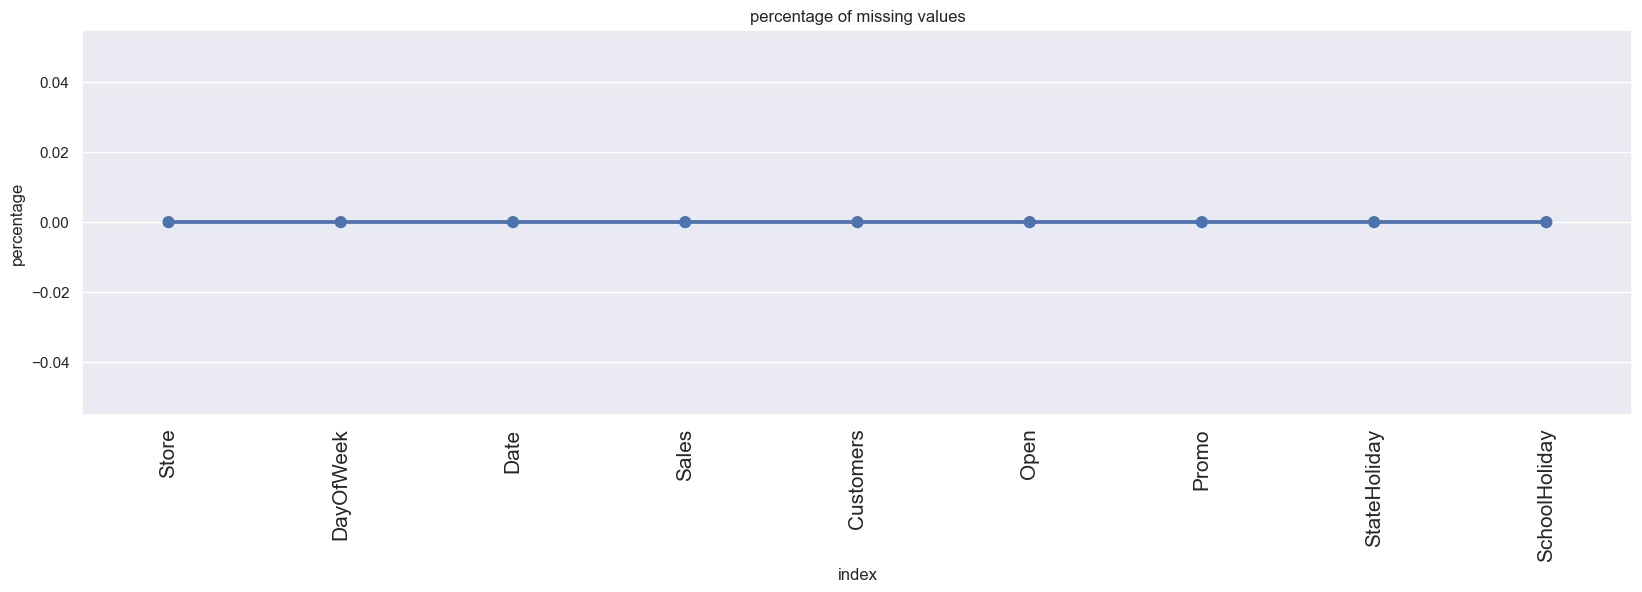

In [19]:
# percentage of missing values
missing=pd.DataFrame((train_df.isnull().sum()*100)/train_df.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

# Test Dataset

In [20]:
test_df.head(25)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0    1      1          4  2015-09-17   1.0      1            0              0
1    2      3          4  2015-09-17   1.0      1            0              0
2    3      7          4  2015-09-17   1.0      1            0              0
3    4      8          4  2015-09-17   1.0      1            0              0
4    5      9          4  2015-09-17   1.0      1            0              0
5    6     10          4  2015-09-17   1.0      1            0              0
6    7     11          4  2015-09-17   1.0      1            0              0
7    8     12          4  2015-09-17   1.0      1            0              0
8    9     13          4  2015-09-17   1.0      1            0              0
9   10     14          4  2015-09-17   1.0      1            0              0
10  11     15          4  2015-09-17   1.0      1            0              0
11  12     16          4  2015-09-17   1.0      1            0              0
12  13     19          4  2015-09-17   1.0      1            0              0
13  14     20          4  2015-09-17   1.0      1            0              0
14  15     21          4  2015-09-17   1.0      1            0              0
15  16     22          4  2015-09-17   1.0      1            0              0
16  17     23          4  2015-09-17   1.0      1            0              0
17  18     24          4  2015-09-17   1.0      1            0              0
18  19     25          4  2015-09-17   1.0      1            0              0
19  20     27          4  2015-09-17   1.0      1            0              0
20  21     29          4  2015-09-17   1.0      1            0              0
21  22     30          4  2015-09-17   1.0      1            0              0
22  23     31          4  2015-09-17   1.0      1            0              0
23  24     32          4  2015-09-17   1.0      1            0              0
24  25     33          4  2015-09-17   1.0      1            0              0

In [21]:
test_df.shape

(41088, 8)

In [22]:
test_df.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [24]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [25]:
print("Missing Values by Column")
print("-"*40)
print(test_df.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",test_df.isna().sum().sum())

Missing Values by Column
----------------------------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
--------------------
TOTAL MISSING VALUES: 11


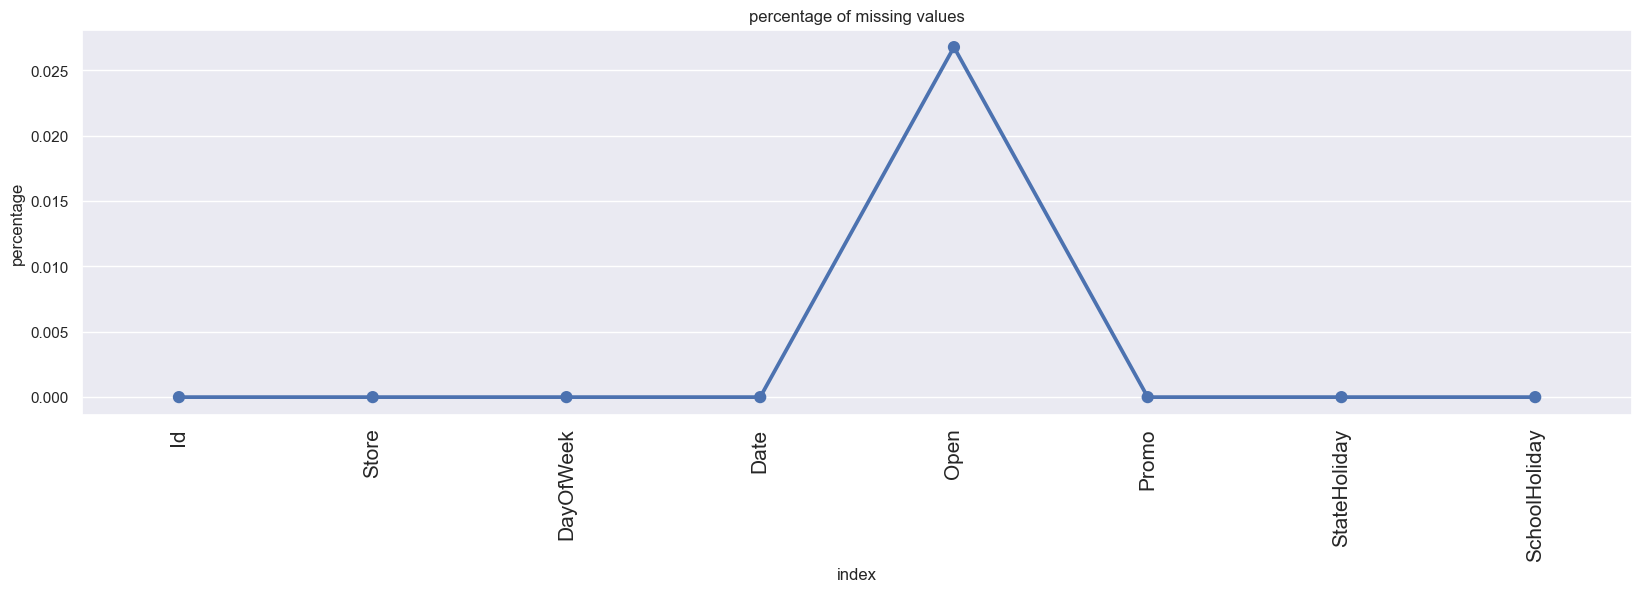

In [26]:
# percentage of missing values
missing=pd.DataFrame((test_df.isnull().sum()*100)/test_df.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

# Store Dataset

In [27]:
store_df.head(25)

Store StoreType Assortment  CompetitionDistance  \
0       1         c          a               1270.0   
1       2         a          a                570.0   
2       3         a          a              14130.0   
3       4         c          c                620.0   
4       5         a          a              29910.0   
5       6         a          a                310.0   
6       7         a          c              24000.0   
7       8         a          a               7520.0   
8       9         a          c               2030.0   
9      10         a          a               3160.0   
10     11         a          c                960.0   
11     12         a          c               1070.0   
12     13         d          a                310.0   
13     14         a          a               1300.0   
14     15         d          c               4110.0   
15     16         a          c               3270.0   
16     17         a          a                 50.0   
17     18         d          c              13840.0   
18     19         a          c               3240.0   
19     20         d          a               2340.0   
20     21         c          c                550.0   
21     22         a          a               1040.0   
22     23         d          a               4060.0   
23     24         a          c               4590.0   
24     25         c          a                430.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        NaN                       NaN       1   
12                        NaN                       NaN       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   
15                        NaN                       NaN       0   
16                       12.0                    2005.0       1   
17                        6.0                    2010.0       1   
18                        NaN                       NaN       1   
19                        5.0                    2009.0       1   
20                       10.0                    1999.0       1   
21                        NaN                       NaN       1   
22                        8.0                    2005.0       0   
23                        3.0                    2000.0       1   
24                        4.0                    2003.0       0   

    Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0               NaN              NaN               NaN  
1              13.0           2010.0   Jan,Apr,Jul,Oct  
2              14.0           2011.0   Jan,Apr,Jul,Oct  
3               NaN              NaN               NaN  
4               NaN              NaN               NaN  
5               NaN              NaN               NaN  
6               NaN              NaN               NaN  
7               NaN              NaN               NaN  
8               NaN              NaN               NaN  
9               NaN              NaN               NaN  
10              1.0           2012.0   Jan,Apr,Jul,Oct  
11             13.0           2010.0   Jan,Apr,Jul,Oct  
12             45.0           2009.0   Feb,May,Aug,Nov  
13             40.0           20

In [28]:
store_df.shape

(1115, 10)

In [29]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [30]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [31]:
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [32]:
print("Missing Values by Column")
print("-"*40)
print(store_df.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",store_df.isna().sum().sum())

Missing Values by Column
----------------------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
--------------------
TOTAL MISSING VALUES: 2343


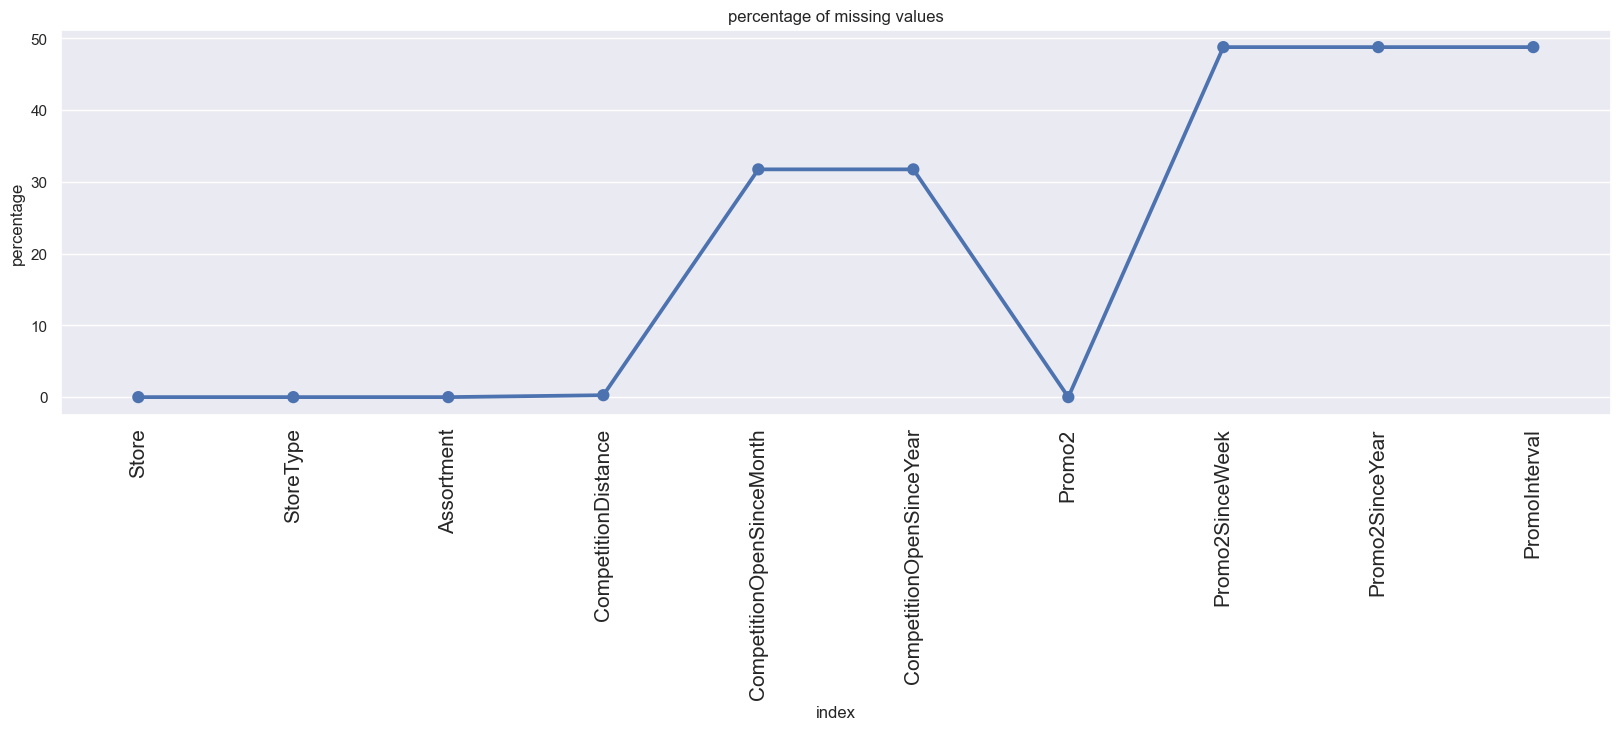

In [33]:
# percentage of missing values
missing=pd.DataFrame((store_df.isnull().sum()*100)/store_df.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

In [34]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [35]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [36]:
train_df['Store'].head(20)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Store, dtype: int64

In [37]:
store_df['Store'].head(20)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Store, dtype: int64

In [38]:
train_store = pd.merge(train_df, store_df, how = 'inner', on = 'Store')

In [39]:
train_store.head(25)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0       1          5  2015-07-31   5263        555     1      1            0   
1       1          4  2015-07-30   5020        546     1      1            0   
2       1          3  2015-07-29   4782        523     1      1            0   
3       1          2  2015-07-28   5011        560     1      1            0   
4       1          1  2015-07-27   6102        612     1      1            0   
5       1          7  2015-07-26      0          0     0      0            0   
6       1          6  2015-07-25   4364        500     1      0            0   
7       1          5  2015-07-24   3706        459     1      0            0   
8       1          4  2015-07-23   3769        503     1      0            0   
9       1          3  2015-07-22   3464        463     1      0            0   
10      1          2  2015-07-21   3558        469     1      0            0   
11      1          1  2015-07-20   4395        526     1      0            0   
12      1          7  2015-07-19      0          0     0      0            0   
13      1          6  2015-07-18   4406        512     1      0            0   
14      1          5  2015-07-17   4852        519     1      1            0   
15      1          4  2015-07-16   4427        517     1      1            0   
16      1          3  2015-07-15   4767        550     1      1            0   
17      1          2  2015-07-14   5042        544     1      1            0   
18      1          1  2015-07-13   5054        553     1      1            0   
19      1          7  2015-07-12      0          0     0      0            0   
20      1          6  2015-07-11   3530        441     1      0            0   
21      1          5  2015-07-10   3808        449     1      0            0   
22      1          4  2015-07-09   3897        480     1      0            0   
23      1          3  2015-07-08   3797        485     1      0            0   
24      1          2  2015-07-07   3650        485     1      0            0   

    SchoolHoliday StoreType Assortment  CompetitionDistance  \
0               1         c          a               1270.0   
1               1         c          a               1270.0   
2               1         c          a               1270.0   
3               1         c          a               1270.0   
4               1         c          a               1270.0   
5               0         c          a               1270.0   
6               0         c          a               1270.0   
7               0         c          a               1270.0   
8               0         c          a               1270.0   
9               0         c          a               1270.0   
10              0         c          a               1270.0   
11              0         c          a               1270.0   
12              0         c          a               1270.0   
13              0         c          a               1270.0   
14              0         c          a               1270.0   
15              0         c          a               1270.0   
16              0         c          a               1270.0   
17              0         c          a               1270.0   
18              0         c          a               1270.0   
19              0         c          a               1270.0   
20              0         c          a               1270.0   
21              0         c          a               1270.0   
22              0         c          a               1270.0   
23              0         c          a               1270.0   
24              0         c          a               1270.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                         9.0                    2008.0       0   
2                         9.0                    2008.0       0   
3               

In [40]:
train_store.shape

(1017209, 18)

In [41]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [42]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [43]:
print("Missing Values by Column")
print("-"*40)
print(train_store.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",train_store.isna().sum().sum())

Missing Values by Column
----------------------------------------
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
--------------------
TOTAL MISSING VALUES: 2173431


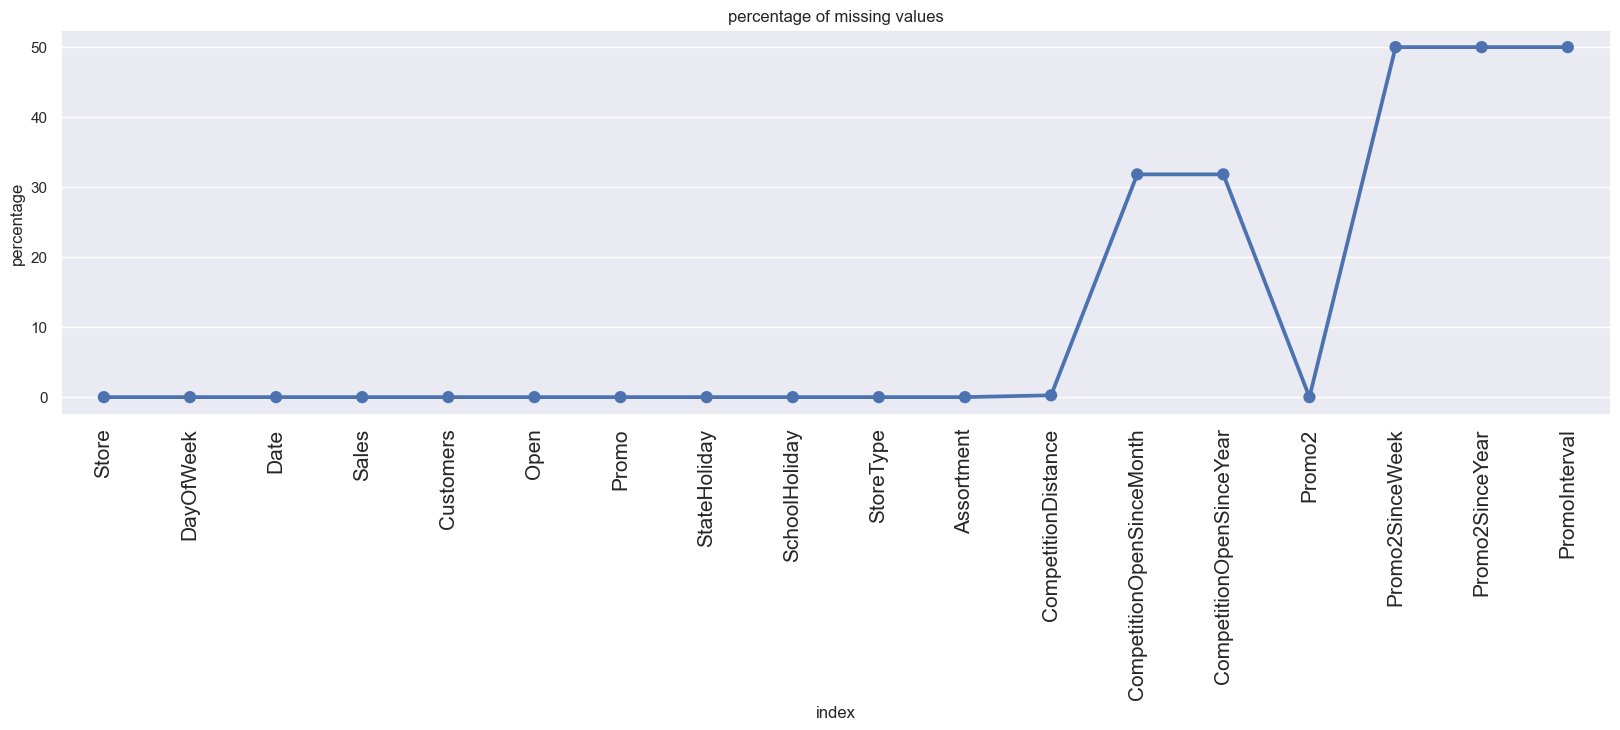

In [44]:
# percentage of missing values
missing=pd.DataFrame((train_store.isnull().sum()*100)/train_store.shape[0]).reset_index()
plt.figure(figsize=(20,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=15)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

In [45]:
train_store.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

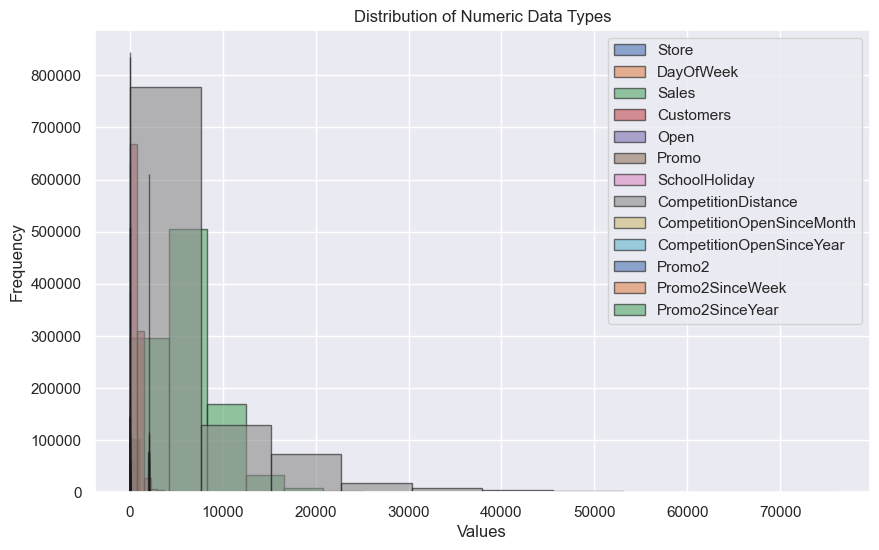

In [46]:
# Identify data types for each column
data_types = train_store.dtypes.to_dict()

# Separate numeric and non-numeric columns
numeric_columns = [col for col, dtype in data_types.items() if dtype.kind in "iuf"]
non_numeric_columns = [col for col, dtype in data_types.items() if dtype.kind not in "iuf"]

# Create bar graphs for each data type

# 1. Numeric Data Types
if numeric_columns:
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(numeric_columns):
        counts, bins, patches = plt.hist(train_store[col], label=col, alpha=0.6, edgecolor="k")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Distribution of Numeric Data Types")
    plt.legend()
    plt.grid(True)
    plt.show()



In [47]:
# check duplicated data:
train_store.loc[train_store.duplicated(keep=False), :]

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

Let's convert the date data to date format and add the seasons to the dataset. Let's also add day, week, month, year variables

In [48]:
train_store["Date"]=pd.to_datetime(train_store["Date"],infer_datetime_format=True)
train_store["Day"]=train_store["Date"].dt.day
train_store["Week"]=train_store["Date"].dt.isocalendar().week
train_store["Month"]=train_store["Date"].dt.month
train_store["Year"]=train_store["Date"].dt.year

# Seasons:
train_store["Season"]=np.where(train_store["Month"].isin([3,4,5]),"Spring",
                           np.where(train_store["Month"].isin([6,7,8]),"Summer",
                                   np.where(train_store["Month"].isin([9,10,11]),"Autumn",
                                           np.where(train_store["Month"].isin([12,1,2]),"Winter","None"))))

train_store[["Date","Day","Week","Month","Year","Season"]].head(20)

Date  Day  Week  Month  Year  Season
0  2015-07-31   31    31      7  2015  Summer
1  2015-07-30   30    31      7  2015  Summer
2  2015-07-29   29    31      7  2015  Summer
3  2015-07-28   28    31      7  2015  Summer
4  2015-07-27   27    31      7  2015  Summer
5  2015-07-26   26    30      7  2015  Summer
6  2015-07-25   25    30      7  2015  Summer
7  2015-07-24   24    30      7  2015  Summer
8  2015-07-23   23    30      7  2015  Summer
9  2015-07-22   22    30      7  2015  Summer
10 2015-07-21   21    30      7  2015  Summer
11 2015-07-20   20    30      7  2015  Summer
12 2015-07-19   19    29      7  2015  Summer
13 2015-07-18   18    29      7  2015  Summer
14 2015-07-17   17    29      7  2015  Summer
15 2015-07-16   16    29      7  2015  Summer
16 2015-07-15   15    29      7  2015  Summer
17 2015-07-14   14    29      7  2015  Summer
18 2015-07-13   13    29      7  2015  Summer
19 2015-07-12   12    28      7  2015  Summer

In [49]:
train_store["Year"].value_counts()


2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

# Cleaning

Handling Missing Value
In this section, we will try to fill in the observations with missing values. Let's visualize the null values

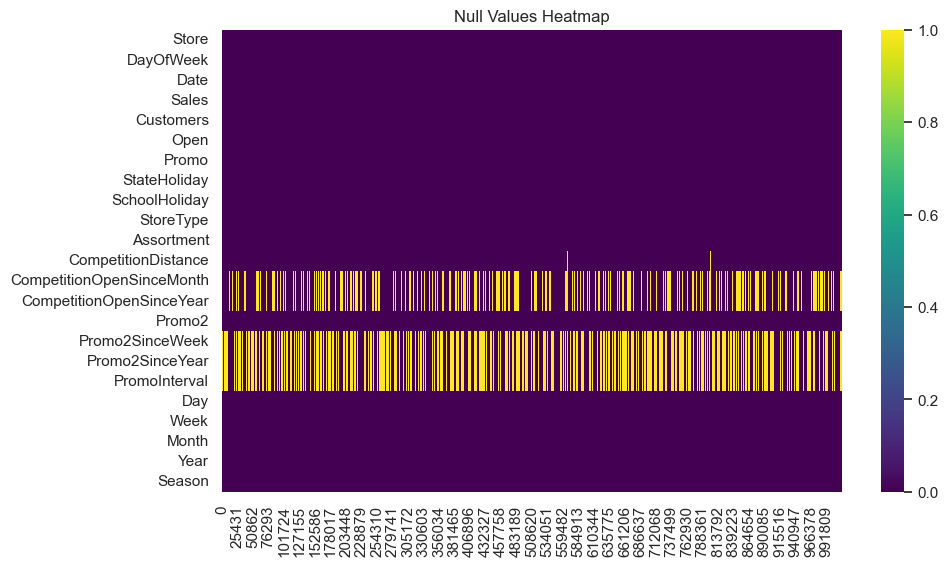

In [50]:
# visualization of missing observations
store_null_counts=train_store.isnull().sum()

# Reshaping the data for heatmap
store_null_matrix = train_store.isnull().T

# Visualizing null counts using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(store_null_matrix, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

Let's check if we can fill the missing values contained in this variable according to the store ids

In [51]:
# Let's look at the store ids
train_store["Store"].unique() 

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

## CompetitionDistance

In [52]:
train_store[train_store.CompetitionDistance.isnull()].head(25)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
263244    291          5 2015-07-31  10052        973     1      1   
263245    291          4 2015-07-30   9030        883     1      1   
263246    291          3 2015-07-29   8204        814     1      1   
263247    291          2 2015-07-28  10374        943     1      1   
263248    291          1 2015-07-27  11692       1086     1      1   
263249    291          7 2015-07-26      0          0     0      0   
263250    291          6 2015-07-25   4132        461     1      0   
263251    291          5 2015-07-24   6932        755     1      0   
263252    291          4 2015-07-23   6263        720     1      0   
263253    291          3 2015-07-22   5679        595     1      0   
263254    291          2 2015-07-21   6722        703     1      0   
263255    291          1 2015-07-20   7040        789     1      0   
263256    291          7 2015-07-19      0          0     0      0   
263257    291          6 2015-07-18   4729        490     1      0   
263258    291          5 2015-07-17   7740        761     1      1   
263259    291          4 2015-07-16   8948        866     1      1   
263260    291          3 2015-07-15   8447        847     1      1   
263261    291          2 2015-07-14  10578       1018     1      1   
263262    291          1 2015-07-13  12663       1198     1      1   
263263    291          7 2015-07-12      0          0     0      0   
263264    291          6 2015-07-11   4888        515     1      0   
263265    291          5 2015-07-10   7548        798     1      0   
263266    291          4 2015-07-09   7571        828     1      0   
263267    291          3 2015-07-08   7540        759     1      0   
263268    291          2 2015-07-07   6841        708     1      0   

       StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
263244            0              1         d  ...                      NaN   
263245            0              1         d  ...                      NaN   
263246            0              1         d  ...                      NaN   
263247            0              1         d  ...                      NaN   
263248            0              1         d  ...                      NaN   
263249            0              0         d  ...                      NaN   
263250            0              0         d  ...                      NaN   
263251            0              1         d  ...                      NaN   
263252            0              1         d  ...                      NaN   
263253            0              1         d  ...                      NaN   
263254            0              1         d  ...                      NaN   
263255            0              1         d  ...                      NaN   
263256            0              0         d  ...                      NaN   
263257            0              0         d  ...                      NaN   
263258            0              1         d  ...                      NaN   
263259            0              1         d  ...                      NaN   
263260            0              1         d  ...                      NaN   
263261            0              1         d  ...                      NaN   
263262            0              1         d  ...                      NaN   
263263            0              0         d  ...                      NaN   
263264            0              0         d  ...                      NaN   
263265            0              0         d  ...                      NaN   
263266            0              0         d  ...                      NaN   
263267            0              0         d  ...                      NaN   
263268            0              0         d  ...                      NaN   

        Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  Day  Week  \
263244       0              NaN              NaN            NaN   31    31   
26

In [53]:
store_id=train_store[train_store.CompetitionDistance.isnull()]["Store"].unique().tolist()

for i in store_id:
    print("Store Id: {}".format(i))
    print("len values: ",len(train_store[train_store["Store"]==i]["CompetitionDistance"]))
    print("missing value: ",train_store[train_store["Store"]==i]["CompetitionDistance"].isnull().sum())
    print("-"*20)

Store Id: 291
len values:  942
missing value:  942
--------------------
Store Id: 622
len values:  942
missing value:  942
--------------------
Store Id: 879
len values:  758
missing value:  758
--------------------


All CompetitionDistance values for store id 291,622,879 are empty. We cannot assign values to the id breakdown, so let's fill these values with the help of the mod.

In [54]:
train_store["CompetitionDistance"]=train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].mode()[0])

In [55]:
train_store[pd.isnull(train_store.CompetitionDistance)]

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Day, Week, Month, Year, Season]
Index: []

[0 rows x 23 columns]

In [56]:
# checking the null values in competition distance
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
dtype: int64

## CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [57]:
train_store[train_store.CompetitionOpenSinceMonth.isnull()]["Store"].unique()

array([  12,   13,   16,   19,   22,   26,   29,   32,   40,   41,   42,
         43,   62,   64,   66,   68,   69,   70,   74,   79,   80,   83,
         91,   92,   93,   94,   97,  100,  101,  105,  111,  114,  128,
        129,  130,  132,  135,  141,  144,  145,  147,  152,  154,  155,
        158,  168,  171,  172,  174,  175,  176,  178,  179,  182,  183,
        184,  187,  188,  193,  194,  195,  201,  206,  207,  215,  216,
        217,  218,  224,  226,  227,  228,  233,  234,  238,  239,  241,
        243,  245,  250,  251,  252,  253,  259,  265,  271,  273,  274,
        277,  279,  283,  284,  285,  288,  291,  309,  310,  313,  324,
        330,  331,  335,  338,  339,  340,  342,  345,  346,  348,  350,
        352,  353,  359,  362,  364,  365,  373,  379,  383,  384,  387,
        388,  392,  394,  396,  397,  398,  404,  408,  409,  411,  412,
        414,  417,  420,  422,  424,  425,  426,  431,  435,  436,  437,
        438,  441,  442,  445,  453,  454,  456,  4

In [58]:
train_store["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [59]:
train_store["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [60]:
store_id2=train_store[train_store.CompetitionOpenSinceMonth.isnull()]["Store"].unique().tolist()

for i in store_id2[:8]:
    print("Store Id: {}".format(i))
    print("len values: ",len(train_store[train_store["Store"]==i]["CompetitionOpenSinceMonth"]))
    print("missing value: ",train_store[train_store["Store"]==i]["CompetitionOpenSinceMonth"].isnull().sum())
    print("-"*20)

Store Id: 12
len values:  942
missing value:  942
--------------------
Store Id: 13
len values:  758
missing value:  758
--------------------
Store Id: 16
len values:  942
missing value:  942
--------------------
Store Id: 19
len values:  942
missing value:  942
--------------------
Store Id: 22
len values:  758
missing value:  758
--------------------
Store Id: 26
len values:  942
missing value:  942
--------------------
Store Id: 29
len values:  942
missing value:  942
--------------------
Store Id: 32
len values:  758
missing value:  758
--------------------


In [61]:
store_id3=train_store[train_store.CompetitionOpenSinceYear.isnull()]["Store"].unique().tolist()

for i in store_id3[:8]:
    print("Store Id: {}".format(i))
    print("len values: ",len(train_store[train_store["Store"]==i]["CompetitionOpenSinceYear"]))
    print("missing value: ",train_store[train_store["Store"]==i]["CompetitionOpenSinceYear"].isnull().sum())
    print("-"*20)

Store Id: 12
len values:  942
missing value:  942
--------------------
Store Id: 13
len values:  758
missing value:  758
--------------------
Store Id: 16
len values:  942
missing value:  942
--------------------
Store Id: 19
len values:  942
missing value:  942
--------------------
Store Id: 22
len values:  758
missing value:  758
--------------------
Store Id: 26
len values:  942
missing value:  942
--------------------
Store Id: 29
len values:  942
missing value:  942
--------------------
Store Id: 32
len values:  758
missing value:  758
--------------------


Since we have no information whatsoever on those missing values and no accurate way of filling those values. So those fields are going to be assigned to 0 .

In [62]:
train_store[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]]=train_store[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].fillna(0)
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
dtype: int64

## Promo2SinceWeek, Promo2SinceYear and PromoInterval

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores. Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

Let's check if there are empty observations in the Promo2SinceWeek, Promo2SinceYear and PromoInterval variables for stores running campaigns:

In [63]:
train_store[train_store["Promo2"]==1][["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].isnull().sum()

Store              0
Promo2             0
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

There are no empty values based on these variables in the stores participating in the campaign. These variables of stores that did not participate in the campaign contain empty values. Let's fill empty values with 0:

In [64]:
train_store[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]]=train_store[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].fillna(0)
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
dtype: int64

In [65]:
# statistical description
train_store.describe().T

count         mean          std     min  \
Store                      1017209.0   558.429727   321.908651     1.0   
DayOfWeek                  1017209.0     3.998341     1.997391     1.0   
Sales                      1017209.0  5773.818972  3849.926175     0.0   
Customers                  1017209.0   633.145946   464.411734     0.0   
Open                       1017209.0     0.830107     0.375539     0.0   
Promo                      1017209.0     0.381515     0.485759     0.0   
SchoolHoliday              1017209.0     0.178647     0.383056     0.0   
CompetitionDistance        1017209.0  5416.631400  7709.807082    20.0   
CompetitionOpenSinceMonth  1017209.0     4.926878     4.283543     0.0   
CompetitionOpenSinceYear   1017209.0  1370.172511   935.363448     0.0   
Promo2                     1017209.0     0.500564     0.500000     0.0   
Promo2SinceWeek            1017209.0    11.647665    15.323928     0.0   
Promo2SinceYear            1017209.0  1007.010608  1005.876930     0.0   
Day                        1017209.0    15.702790     8.787638     1.0   
Week                       1017209.0    23.615515    14.433381     1.0   
Month                      1017209.0     5.846762     3.326097     1.0   
Year                       1017209.0  2013.832292     0.777396  2013.0   

                              25%     50%     75%      max  
Store                       280.0   558.0   838.0   1115.0  
DayOfWeek                     2.0     4.0     6.0      7.0  
Sales                      3727.0  5744.0  7856.0  41551.0  
Customers                   405.0   609.0   837.0   7388.0  
Open                          1.0     1.0     1.0      1.0  
Promo                         0.0     0.0     1.0      1.0  
SchoolHoliday                 0.0     0.0     0.0      1.0  
CompetitionDistance         700.0  2320.0  6880.0  75860.0  
CompetitionOpenSinceMonth     0.0     4.0     9.0     12.0  
CompetitionOpenSinceYear      0.0  2006.0  2011.0   2015.0  
Promo2                        0.0     1.0     1.0      1.0  
Promo2SinceWeek               0.0     1.0    22.0     50.0  
Promo2SinceYear               0.0  2009.0  2012.0   2015.0  
Day                           8.0    16.0    23.0     31.0  
Week                         11.0    22.0    35.0     52.0  
Month                         3.0     6.0     8.0     12.0  
Year                       2013.0  2014.0  2014.0   2015.0

## Reading the description report

### Sales



The minimum sale is 0

The maximum sale is 41551.00

25% of sale is below 3727.000

50% of sale is below 5744.000

75% of sale is below 7856.000

### Customers

The minimum customer is 0

The maximum customer is 7388

25% of customer is below 405

50% of customer is below 609

75% of customer is below 837

In [66]:
# copy
clean_trainScore_df = train_store.copy()

## Exploratory Data Analysis
In this section, we will examine the data and make inferences from the data

### Sales Distribution

Text(0.5, 1.0, 'Sales Distribution')

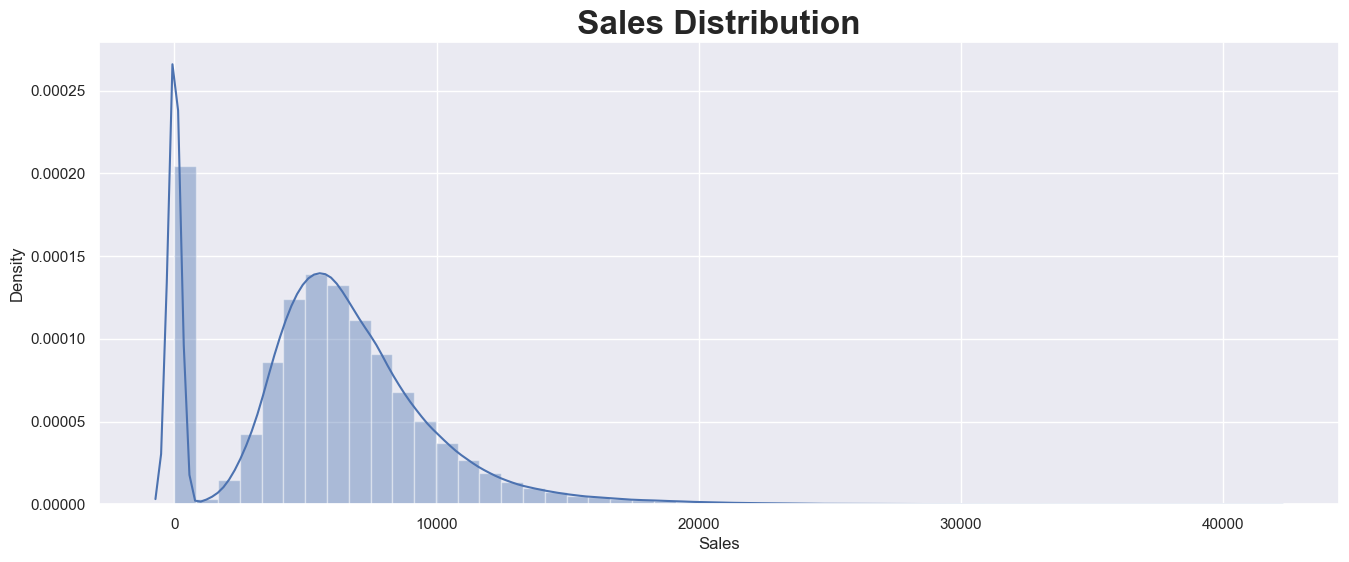

In [67]:
# using displot
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

In [68]:
#group by storetype
clean_trainScore_df.groupby('StoreType')['Sales'].describe()

count          mean          std  min     25%     50%       75%  \
StoreType                                                                       
a          551627.0   5738.179710  3964.028134  0.0  3508.0  5618.0   7860.00   
b           15830.0  10058.837334  5280.525506  0.0  6227.0  9025.5  13082.75   
c          136840.0   5723.629246  3721.700886  0.0  3789.0  5766.0   7849.00   
d          312912.0   5641.819243  3473.393781  0.0  3986.0  5826.0   7691.00   

               max  
StoreType           
a          41551.0  
b          38722.0  
c          31448.0  
d          38037.0

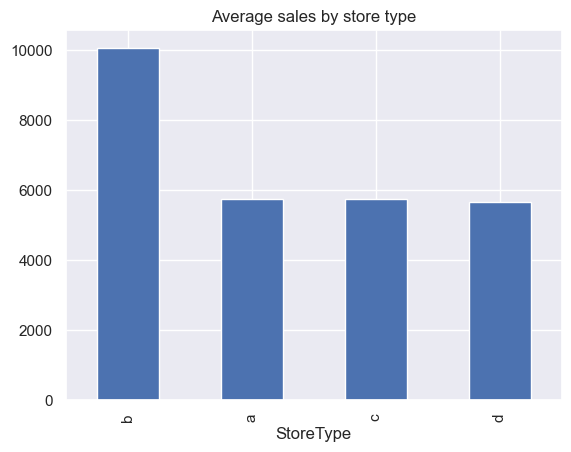

In [69]:
group2=clean_trainScore_df.groupby("StoreType")["Sales"].mean().sort_values(ascending=False)
group2.plot(kind="bar")
plt.title("Average sales by store type")
plt.show()

StoreType B shows better average of Sales among all others.

In [70]:
# customers and sales grouped by storetype
clean_trainScore_df.groupby('StoreType')['Customers', 'Sales'].sum()

Customers       Sales
StoreType                       
a          363541434  3165334859
b           31465621   159231395
c           92129705   783221426
d          156904995  1765392943

Important things from the above
1. store a has the highest sales and customers
2. store d has the second highest sales
3. store b has the least sales

### Let's examine sales of each year in promotion breakdown

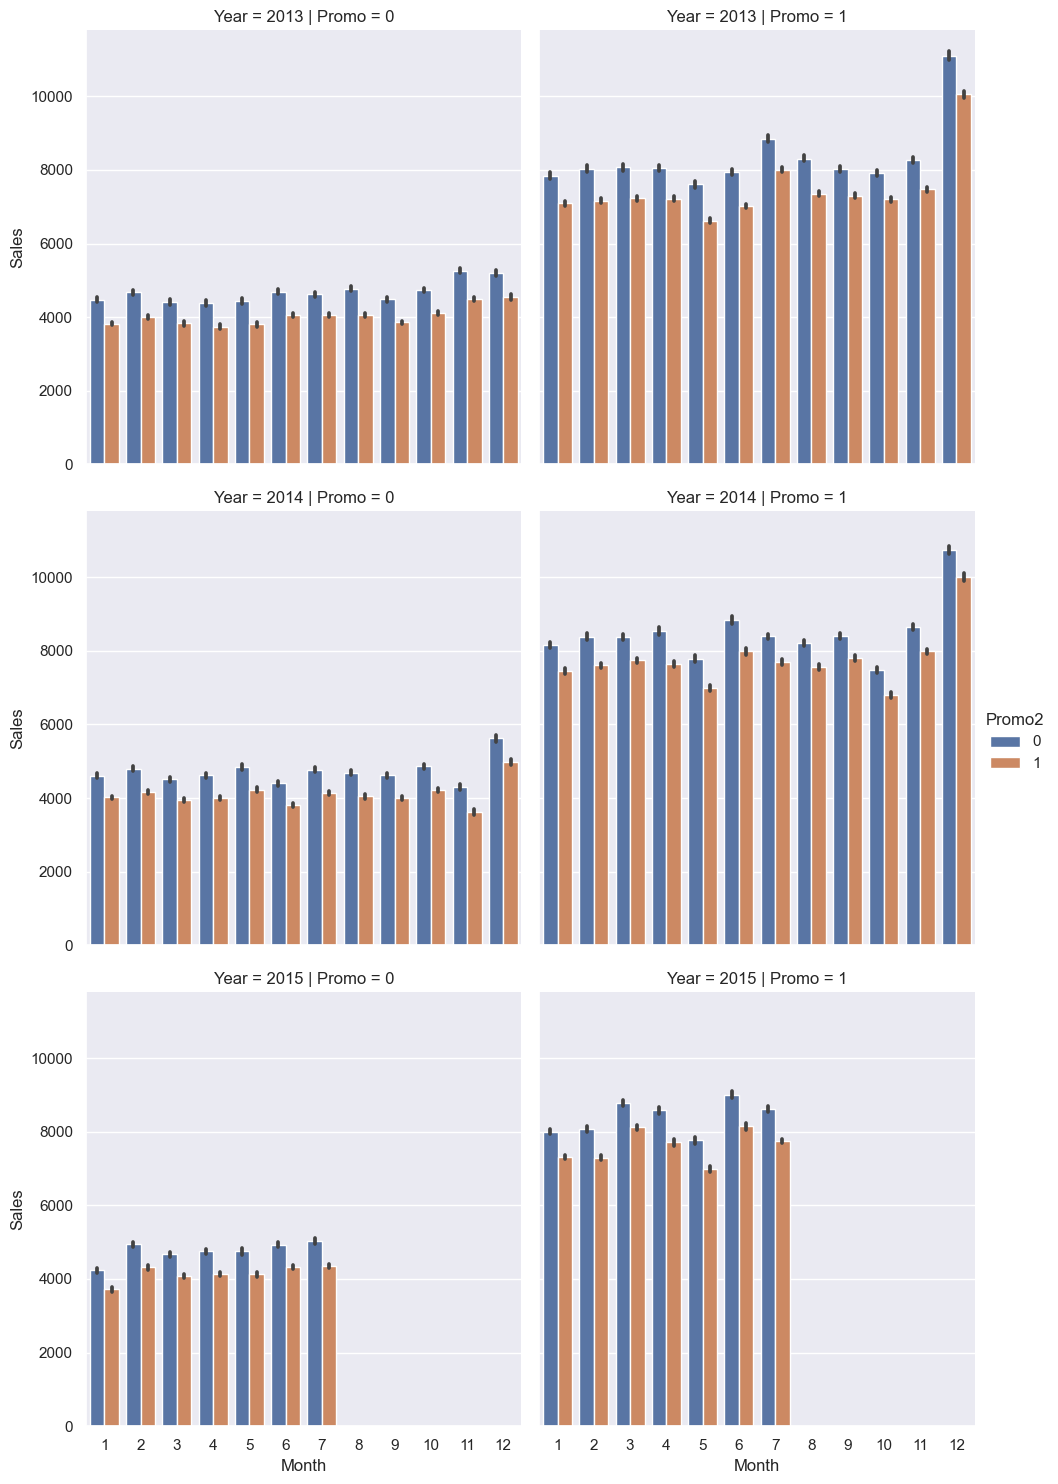

In [71]:
sns.catplot(data = clean_trainScore_df, x='Month', y='Sales',
              col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.show()

1. We see that the campaigns carried out by the stores themselves and the campaigns jointly organized by the company have an increasing effect on sales.
2. Strong sales are achieved when participating in the corporate campaign in the last month of the year.

#### sales trend  with respect to month

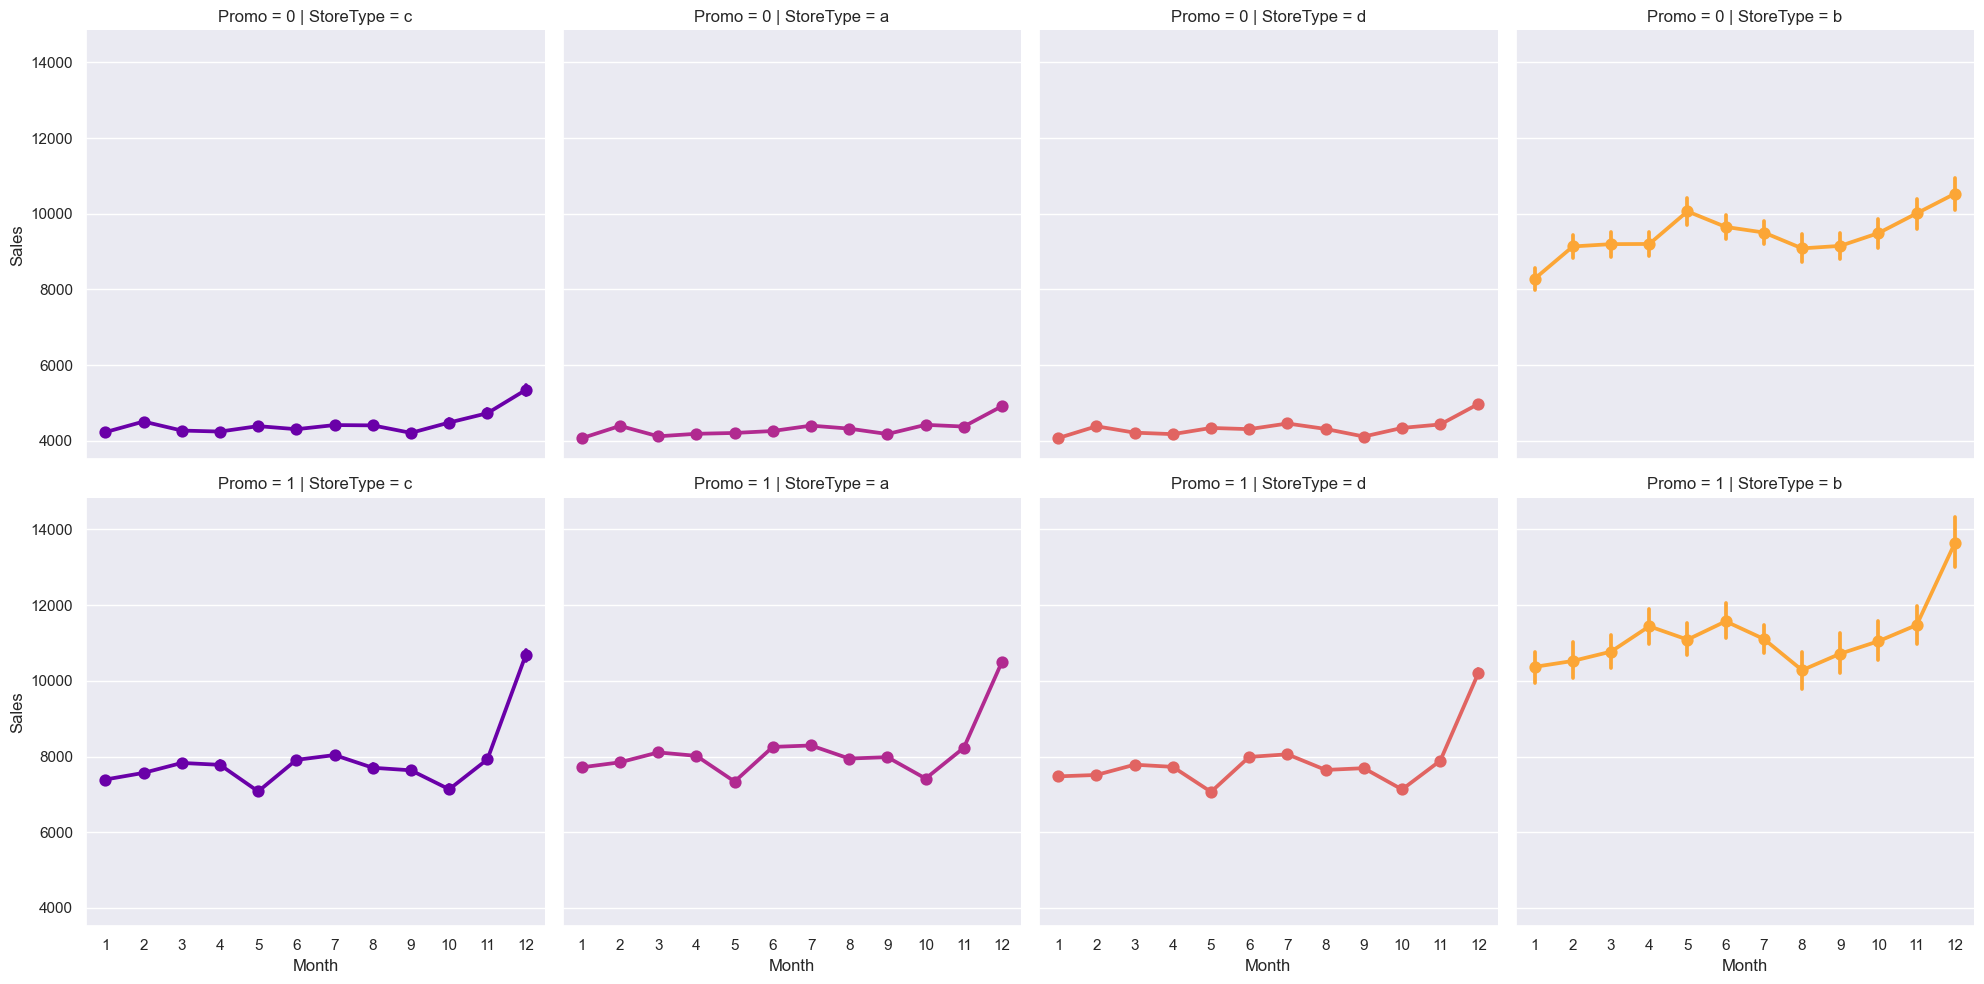

In [72]:
 
color="yellow"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = color) 

### Let's examine sales according seasonals:

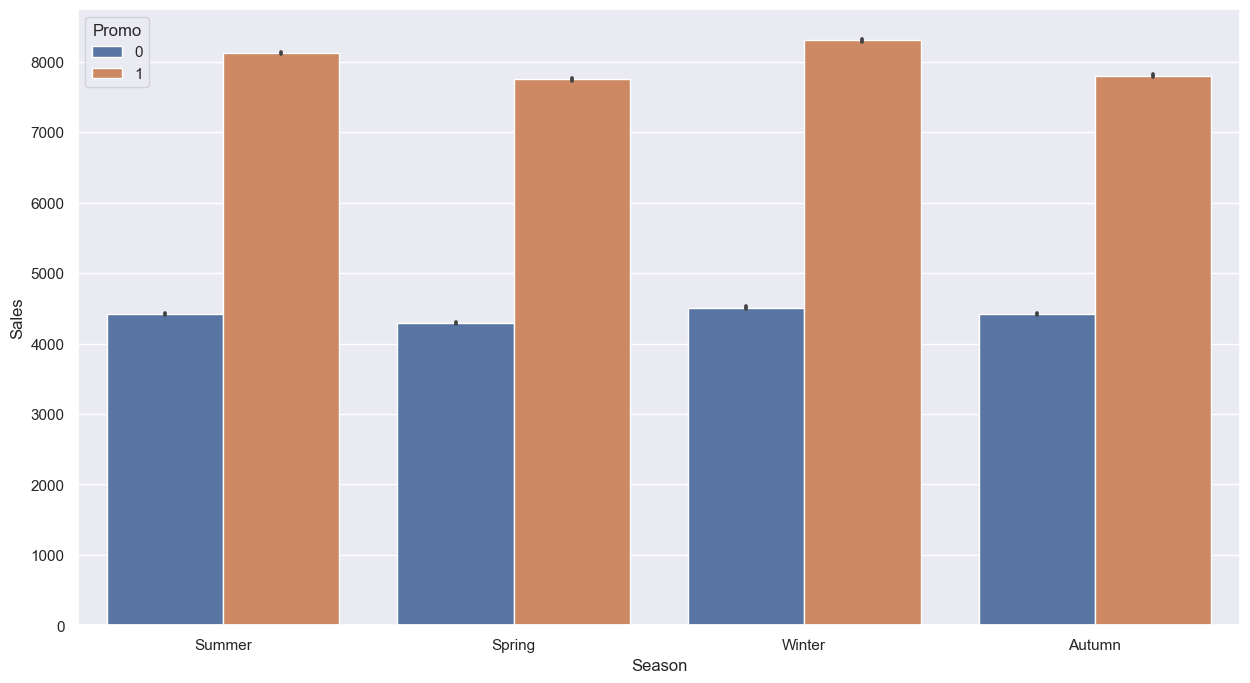

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(x="Season",y="Sales",data=clean_trainScore_df, hue="Promo")
plt.show()

There are more sales in summer and winter months. But there is no clear distinction.

### Sales performance of product variety according to campaign status

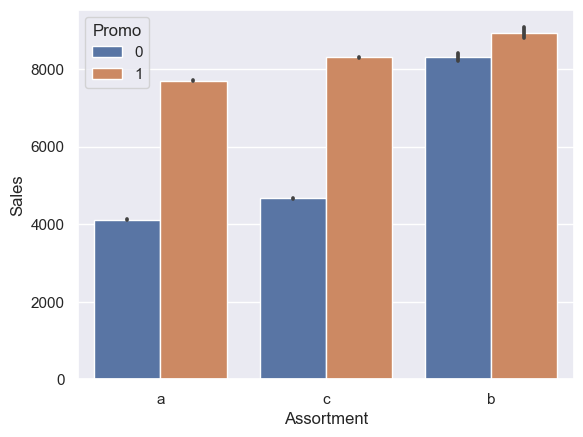

In [74]:
sns.barplot(x="Assortment",y="Sales",hue="Promo",data=clean_trainScore_df);

Extra products have strong sales volume with or without a campaign. For other products, sales volume increases during campaign periods.

### Customers Distribution

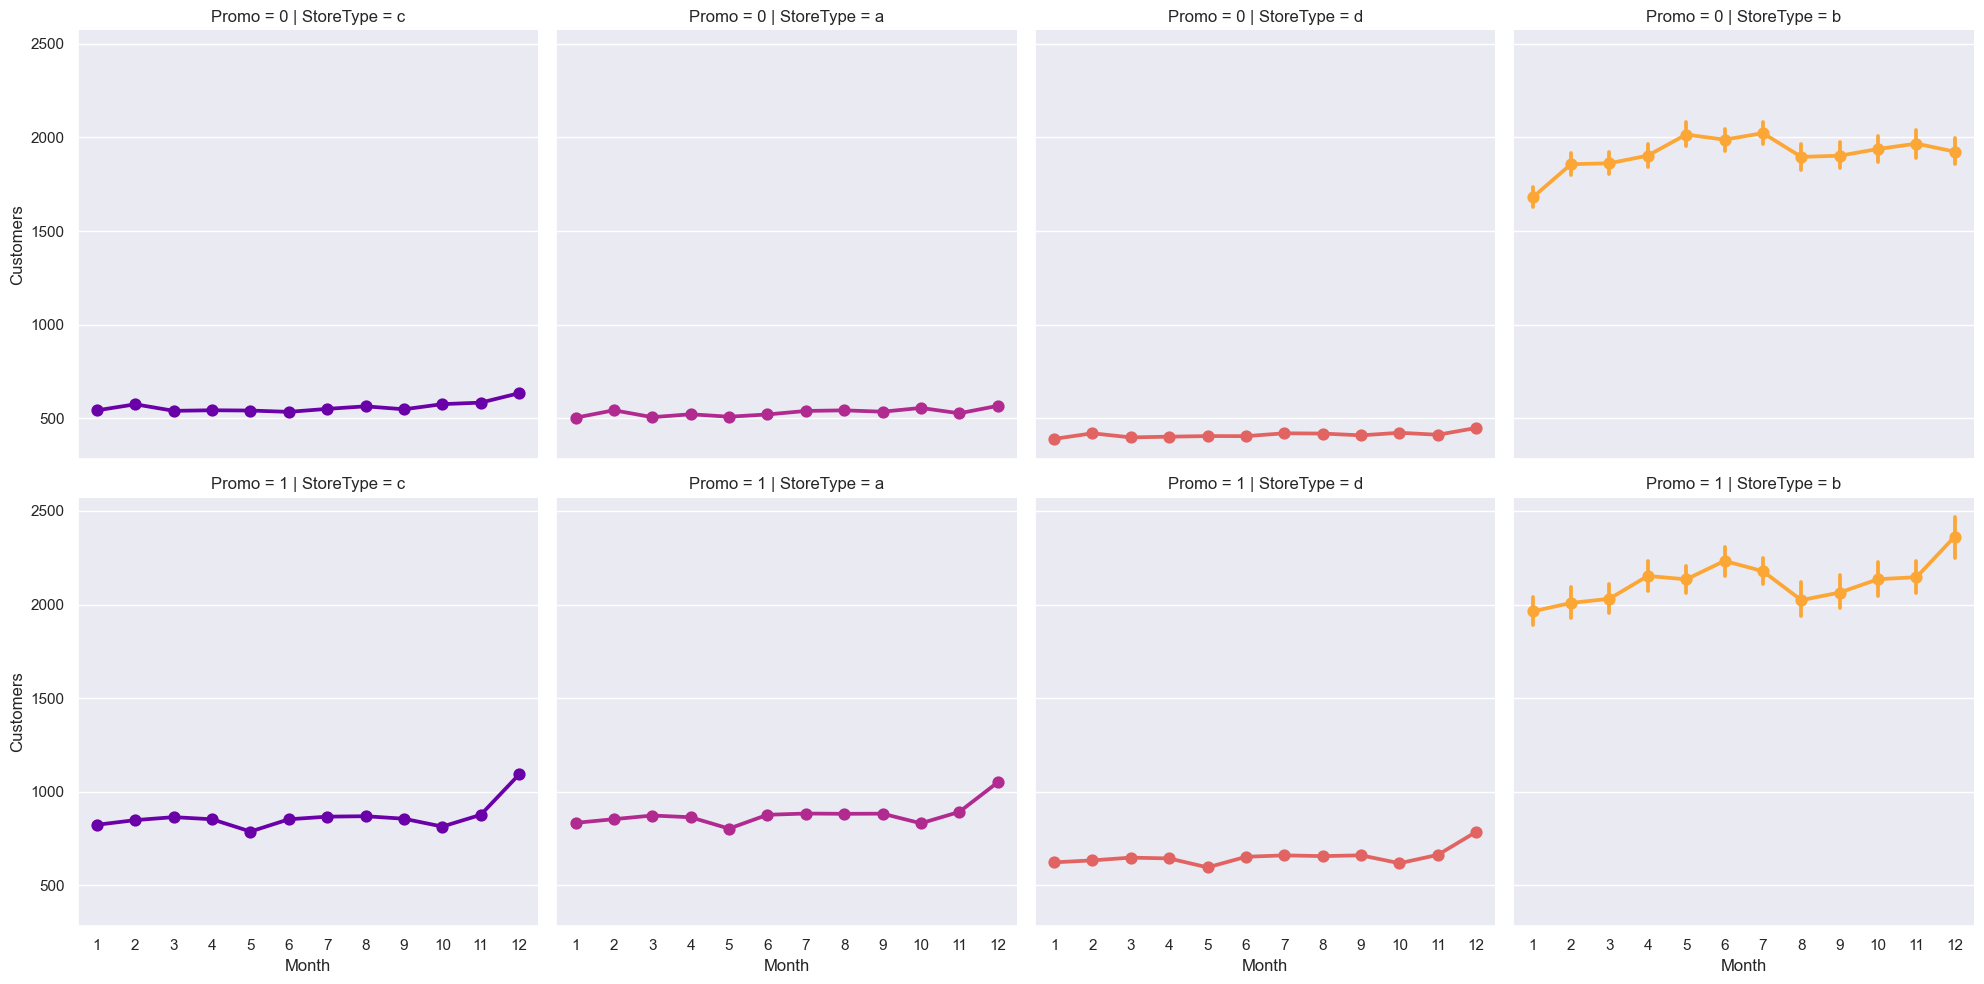

In [75]:
# Customer trends
c="blue"
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

Distribution of customer numbers according to campaign status

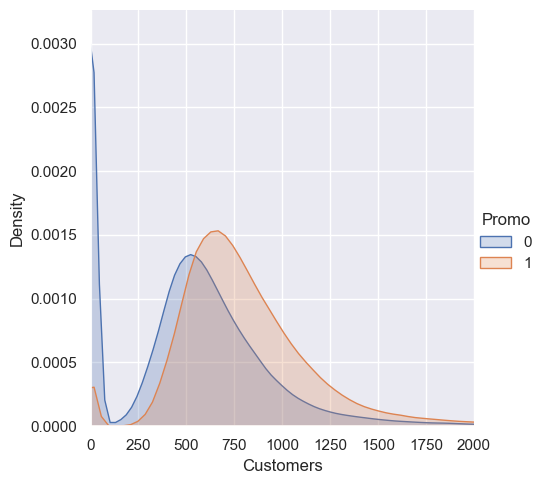

In [76]:
(sns
 .FacetGrid(clean_trainScore_df,
         hue="Promo",
         height=5,
         xlim=(0,2000))
 .map(sns.kdeplot,"Customers",shade=True)
 .add_legend()
);

Effect of special days on sales:

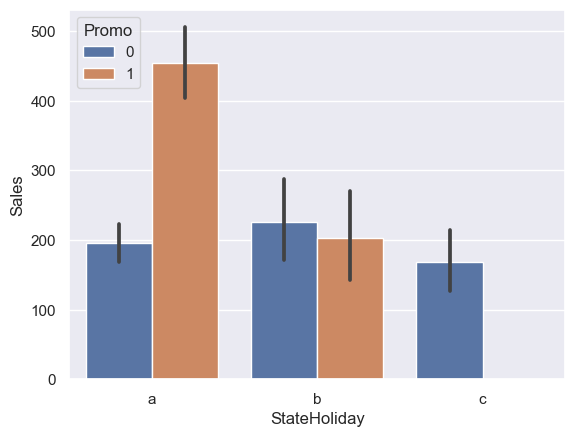

In [77]:
special_days_sales=clean_trainScore_df[clean_trainScore_df["StateHoliday"].isin(["a","b","c"])]
sns.barplot(x="StateHoliday",y="Sales",hue="Promo",data=special_days_sales);

Public holidays are repeated more frequently throughout the year than other holidays. Therefore, the highest sales volume occurs on public holidays and running campaigns has a positive effect on increasing sales

Sales escalate towards Christmas holidays

Text(0.5, 1.0, 'Customers Distribution')

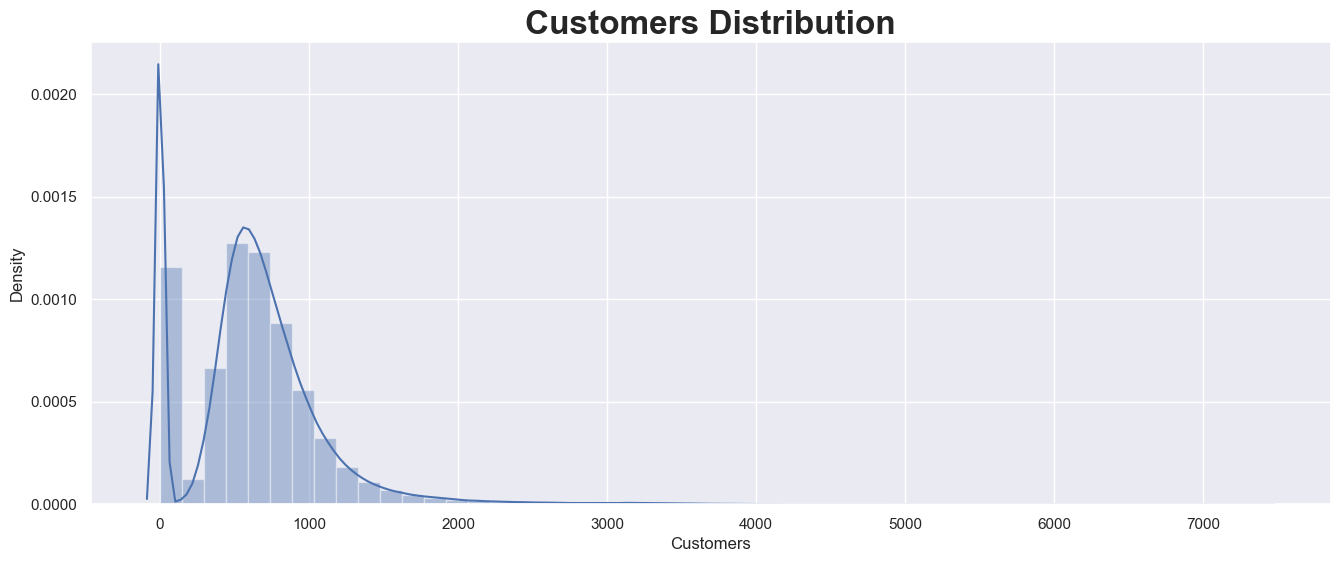

In [78]:
plt.figure(figsize=(16, 6))
sns.distplot(clean_trainScore_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

### As it is observed from the above figuers, some outliers are shown in both sales and customers distribuiton

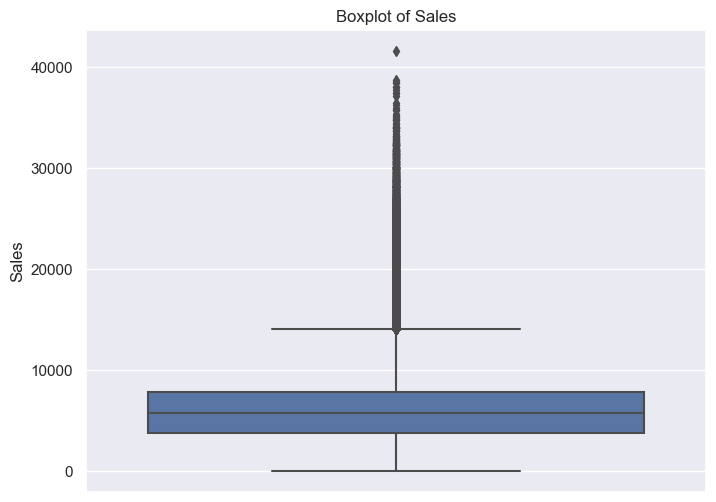

In [79]:
# checking using box plot
import seaborn as sns

# Box plot for 'Sales' column using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=clean_trainScore_df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()


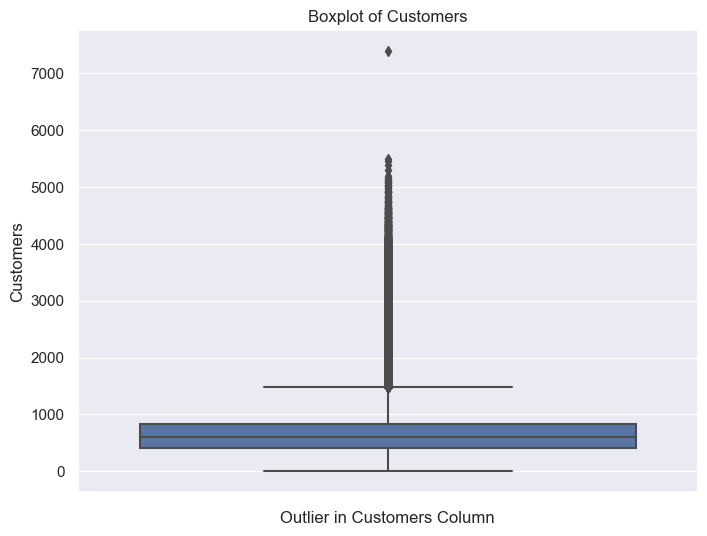

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_trainScore_df, y='Customers')
plt.title('Boxplot of Customers')
plt.ylabel('Customers')
plt.xlabel('Outlier in Customers Column')
plt.show()

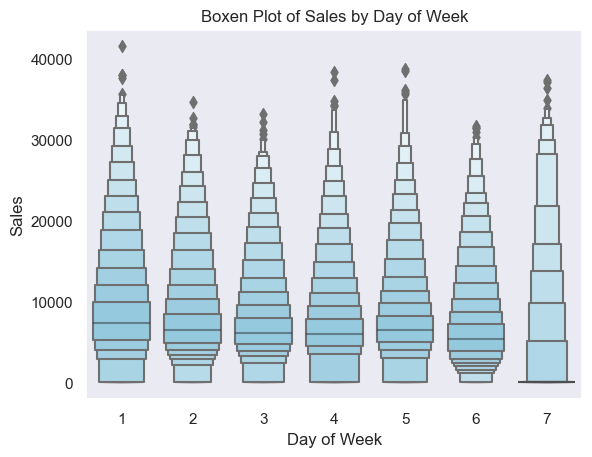

In [81]:
sns.boxenplot(data=clean_trainScore_df, scale="linear", x="DayOfWeek", y="Sales", color="skyblue")
plt.title('Boxen Plot of Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()

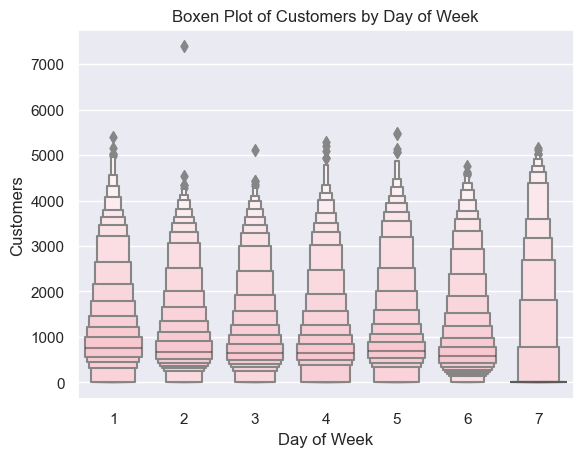

In [82]:
sns.boxenplot(y="Customers", x="DayOfWeek", data=clean_trainScore_df, scale="linear", color="pink")
plt.title('Boxen Plot of Customers by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Customers')
 
plt.show()

The data shows outliers, this can be caused due to Holiday or promotion effect. the outliers need to be handled

In [83]:
# Replace outliers in the 'Customers' column with the median value
column = 'Customers'
Q1 = clean_trainScore_df[column].quantile(0.25)
Q3 = clean_trainScore_df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_trainScore_df[column] = clean_trainScore_df[column].apply(
    lambda x: clean_trainScore_df[column].median() if x < lower_bound or x > upper_bound else x
)
 

In [84]:
# Replace outliers in the 'Sales' column with the median value
column = 'Sales'
Q1 = clean_trainScore_df[column].quantile(0.25)
Q3 = clean_trainScore_df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_trainScore_df[column] = clean_trainScore_df[column].apply(
    lambda x: clean_trainScore_df[column].median() if x < lower_bound or x > upper_bound else x
)
 

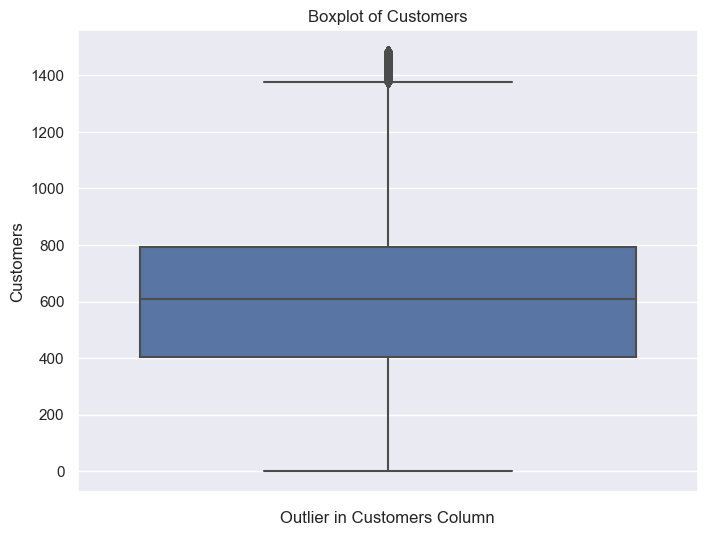

In [85]:
#Boxplot of Customers column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_trainScore_df, y='Customers')
plt.title('Boxplot of Customers')
plt.ylabel('Customers')
plt.xlabel('Outlier in Customers Column')
plt.show()

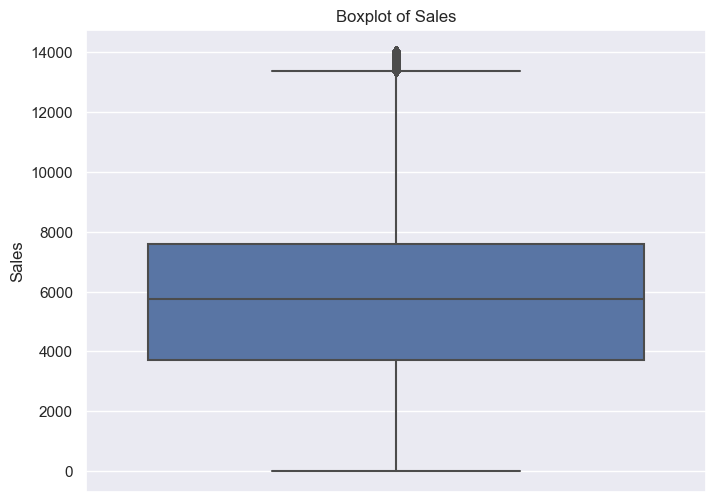

In [86]:
#Boxplot of Sales column after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=clean_trainScore_df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()


### DayOfWeek Vs Open distribution

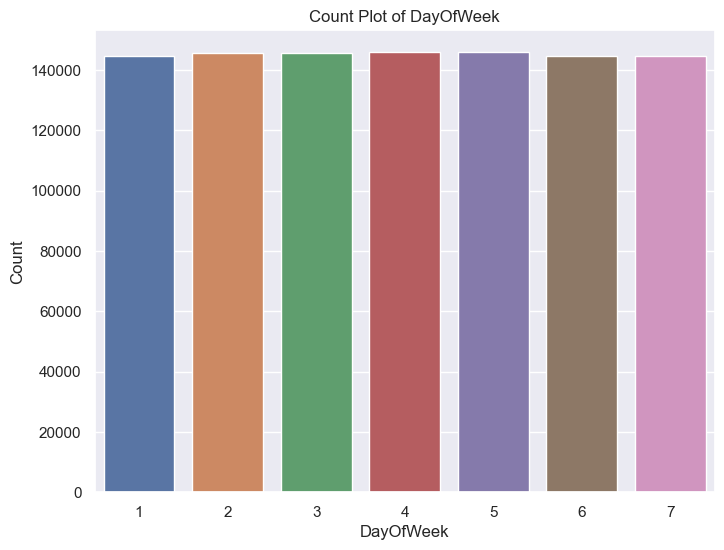

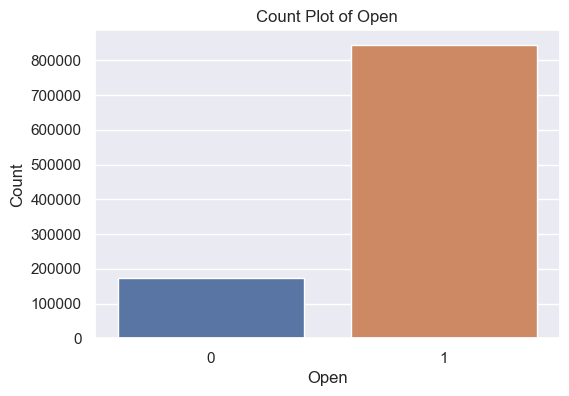

In [87]:
# Count plot for 'DayOfWeek'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='DayOfWeek')
plt.title('Count Plot of DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.show()

# Count plot for 'Open' 
plt.figure(figsize=(6, 4))
sns.countplot(data=clean_trainScore_df, x='Open')
plt.title('Count Plot of Open')
plt.xlabel('Open')
plt.ylabel('Count')
plt.show()

### State Holiday, School Holidays & Promo distribution

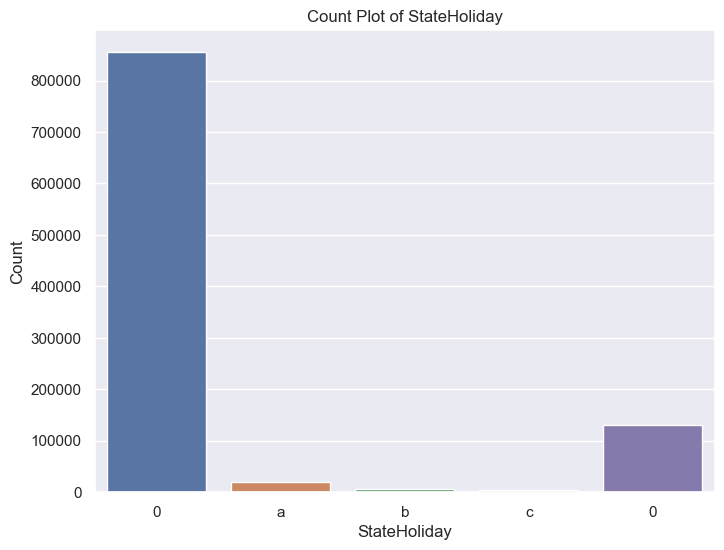

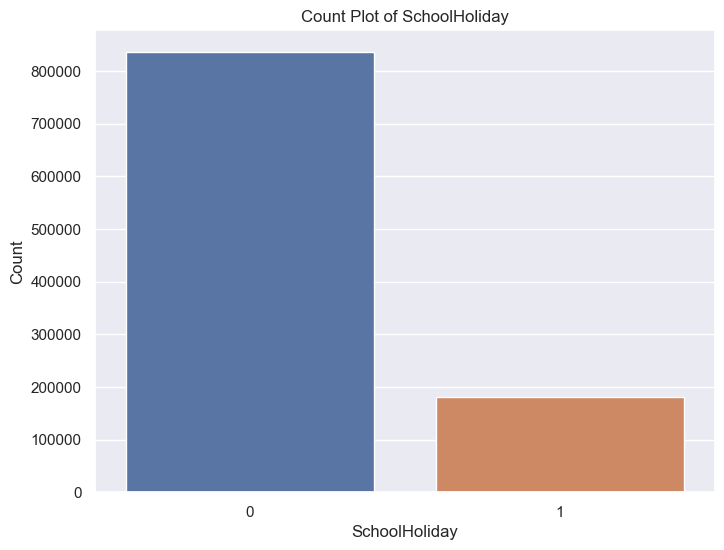

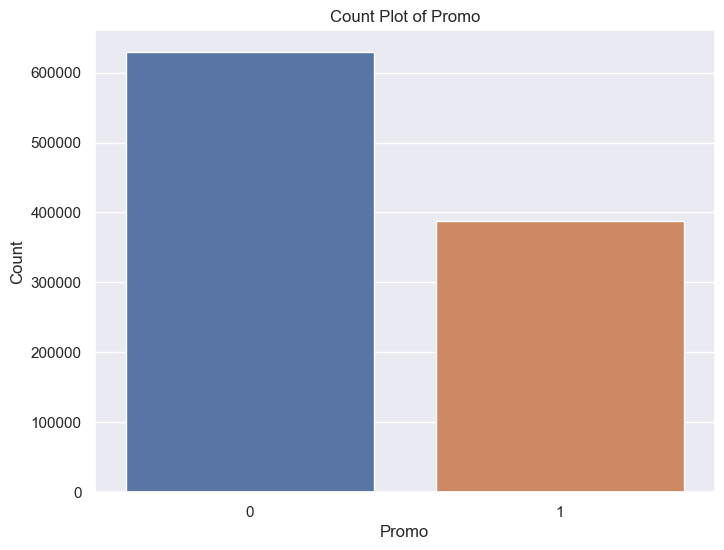

In [88]:
# Count plot for 'StateHoliday' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='StateHoliday')
plt.title('Count Plot of StateHoliday')
plt.xlabel('StateHoliday')
plt.ylabel('Count')
plt.show()

# Count plot for 'SchoolHoliday' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='SchoolHoliday')
plt.title('Count Plot of SchoolHoliday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Count')
plt.show()

# Count plot for 'Promo'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo')
plt.title('Count Plot of Promo')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.show()

### store distribution

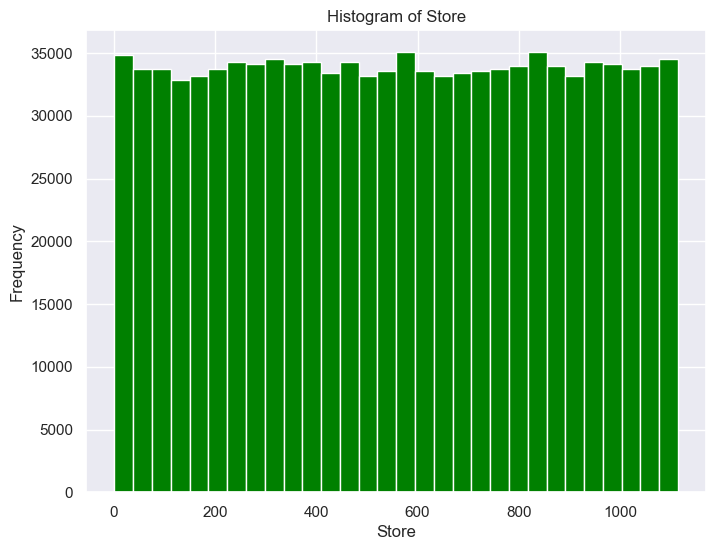

In [89]:
# Histplot for 'Store'
plt.figure(figsize=(8, 6))
plt.hist(clean_trainScore_df['Store'], color='green', bins=30)
plt.title('Histogram of Store')
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.show()

### Year, Month & WeekOfYear distribution

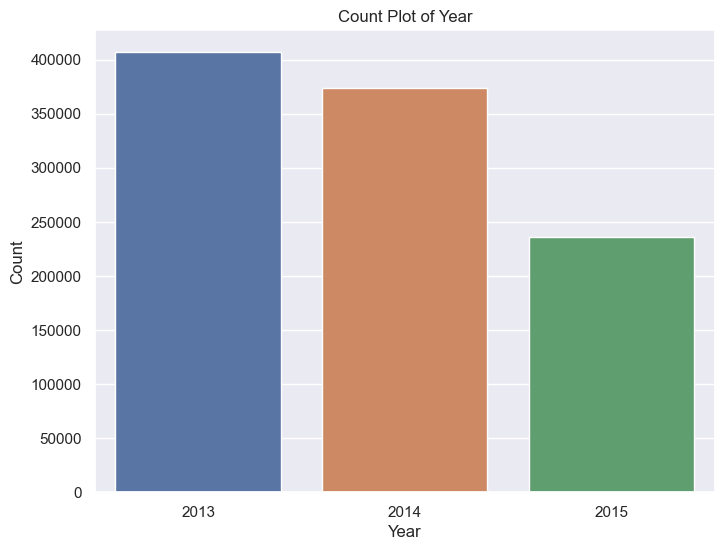

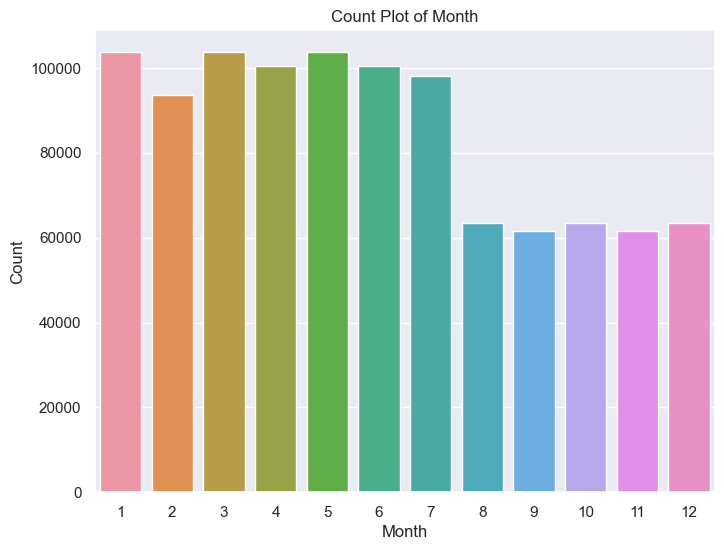

In [90]:
# Count plot for 'Year' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Year')
plt.title('Count Plot of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Count plot for 'Month' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Month')
plt.title('Count Plot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


### StoreType, Assortment and Promo2 distribution

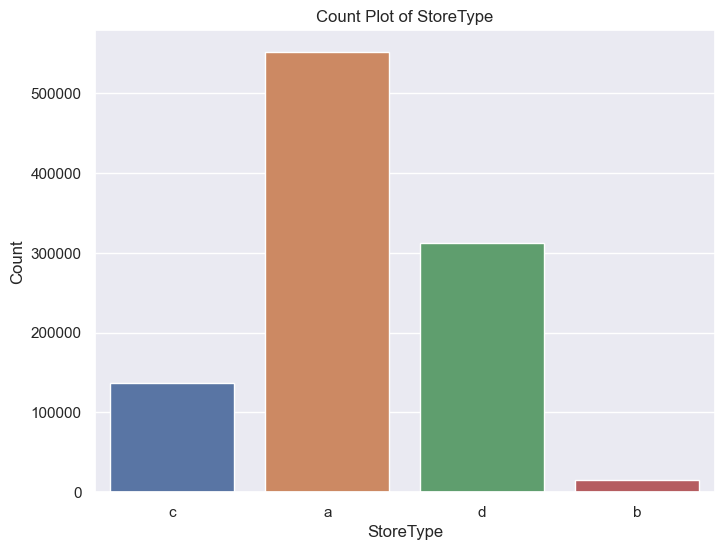

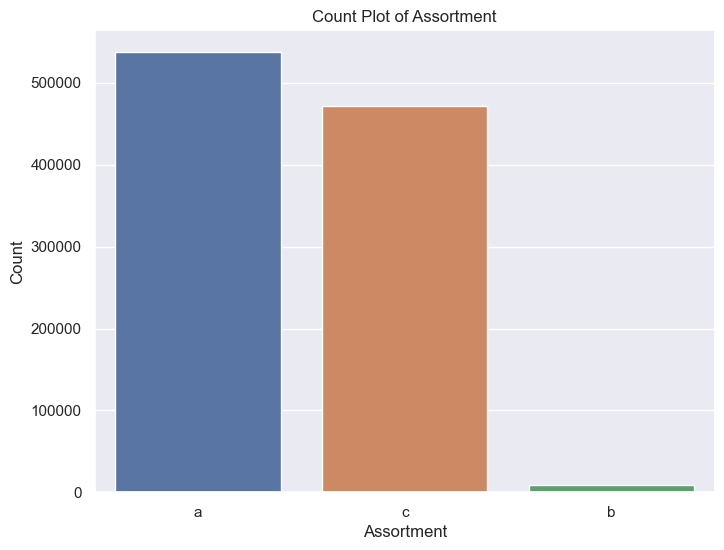

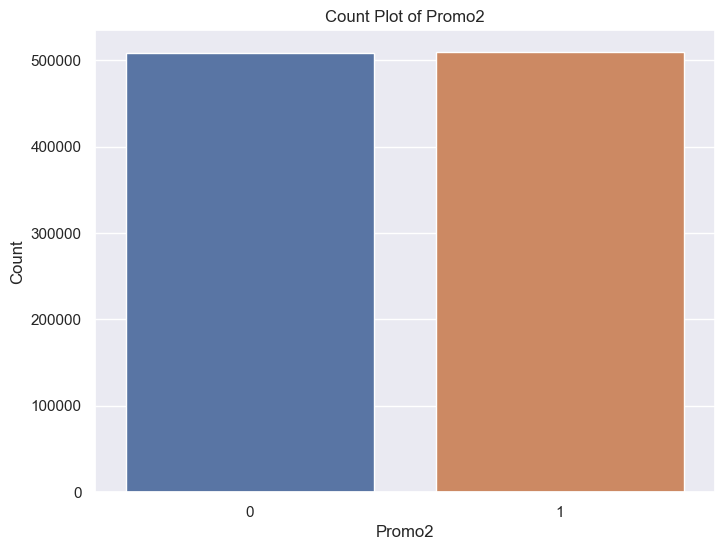

In [91]:
# Count plot for 'StoreType' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='StoreType')
plt.title('Count Plot of StoreType')
plt.xlabel('StoreType')
plt.ylabel('Count')
plt.show()

# Count plot for 'Assortment'
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Assortment')
plt.title('Count Plot of Assortment')
plt.xlabel('Assortment')
plt.ylabel('Count')
plt.show()

# Count plot for 'Promo2' 
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo2')
plt.title('Count Plot of Promo2')
plt.xlabel('Promo2')
plt.ylabel('Count')
plt.show()

### examine Rossman Stores' sales relative to opening date of nearby competitors

In [92]:
clean_trainScore_df["CompetitionOpen"]=12*(clean_trainScore_df["Year"]-clean_trainScore_df["CompetitionOpenSinceYear"])+(clean_trainScore_df["Month"]-clean_trainScore_df["CompetitionOpenSinceMonth"])
# We converted the year to month and added the month values.
clean_trainScore_df["PromoOpen"]=12*(clean_trainScore_df["Year"]-clean_trainScore_df["Promo2SinceYear"])+(clean_trainScore_df["Week"]-clean_trainScore_df["Promo2SinceWeek"])/4.0
# We converted the year to month and added the week values.

<Figure size 1500x1200 with 0 Axes>

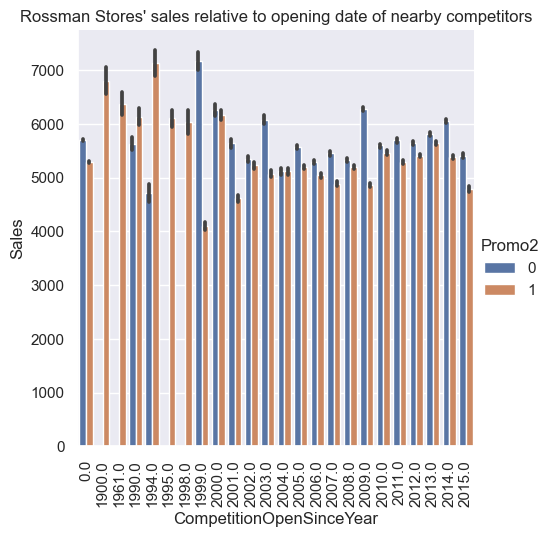

In [93]:
plt.figure(figsize=(15,12))
sns.catplot(data = clean_trainScore_df, x='CompetitionOpenSinceYear', y='Sales', hue='Promo2', kind="bar")
plt.xticks(rotation=90)
plt.title("Rossman Stores' sales relative to opening date of nearby competitors")
plt.show()

1. Rossman stores close to rival stores that have been in service for many years can increase their market share when they run campaigns.
2. We can say that the competitive situation is strong against stores established after 1999.

### Change in sales per customer according to seasons

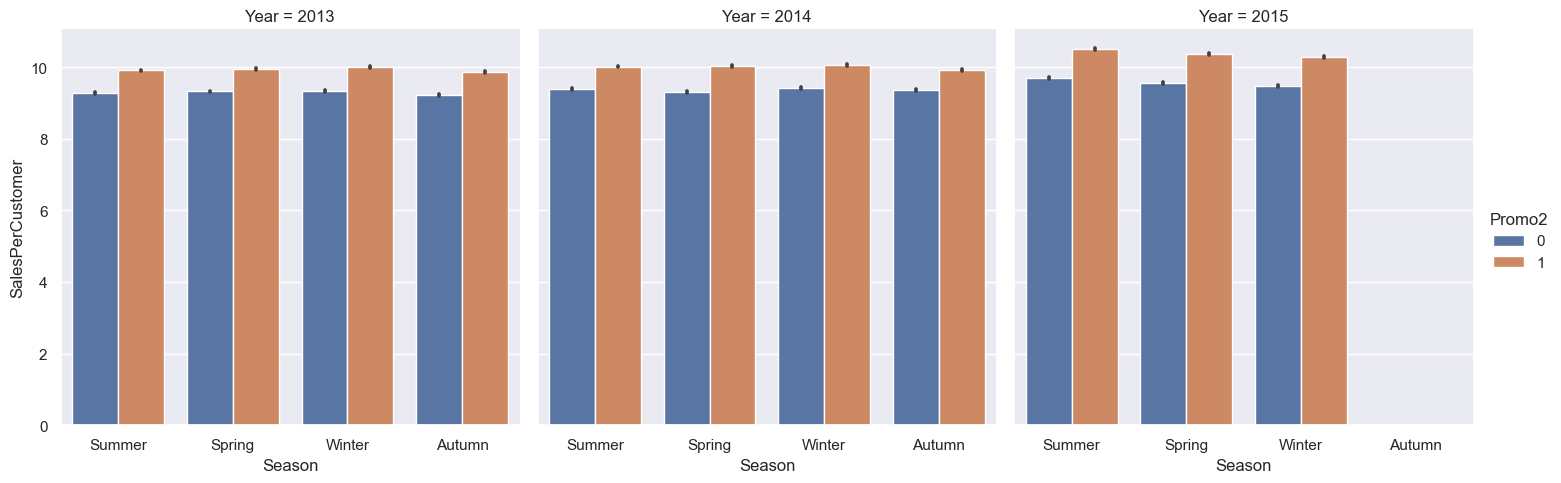

In [94]:
clean_trainScore_df["SalesPerCustomer"]=clean_trainScore_df["Sales"]/clean_trainScore_df["Customers"]

sns.catplot(data = clean_trainScore_df, x='Season', y='SalesPerCustomer', hue='Promo2', col='Year', kind="bar")
plt.show()

In [95]:
clean_trainScore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
CompetitionOpen                   0
PromoOpen                         0
SalesPerCustomer             172869
dtype: int64

In [96]:
# SalesPerCustomer includes 172869 missing value. Sales=0/Customer=0=NA - > Let's look at the sales on the days the store was closed.
df_not_oppen=clean_trainScore_df[clean_trainScore_df.Open==0]
df_not_oppen[(df_not_oppen["Sales"]==0) | (df_not_oppen["Customers"]==0)].shape

(172817, 26)

In [97]:
clean_trainScore_df[(clean_trainScore_df.Open == 1) & (clean_trainScore_df.Sales == 0)].shape[0]

54

There are null values due to the above situations. Let's fill these with 0:

In [98]:
clean_trainScore_df["SalesPerCustomer"]=clean_trainScore_df["SalesPerCustomer"].fillna(0)
clean_trainScore_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
CompetitionOpen              0
PromoOpen                    0
SalesPerCustomer             0
dtype: int64

In [99]:
#Adding salespercustomer column
clean_trainScore_df['SalesperCustomer']=clean_trainScore_df['Sales']/clean_trainScore_df['Customers']

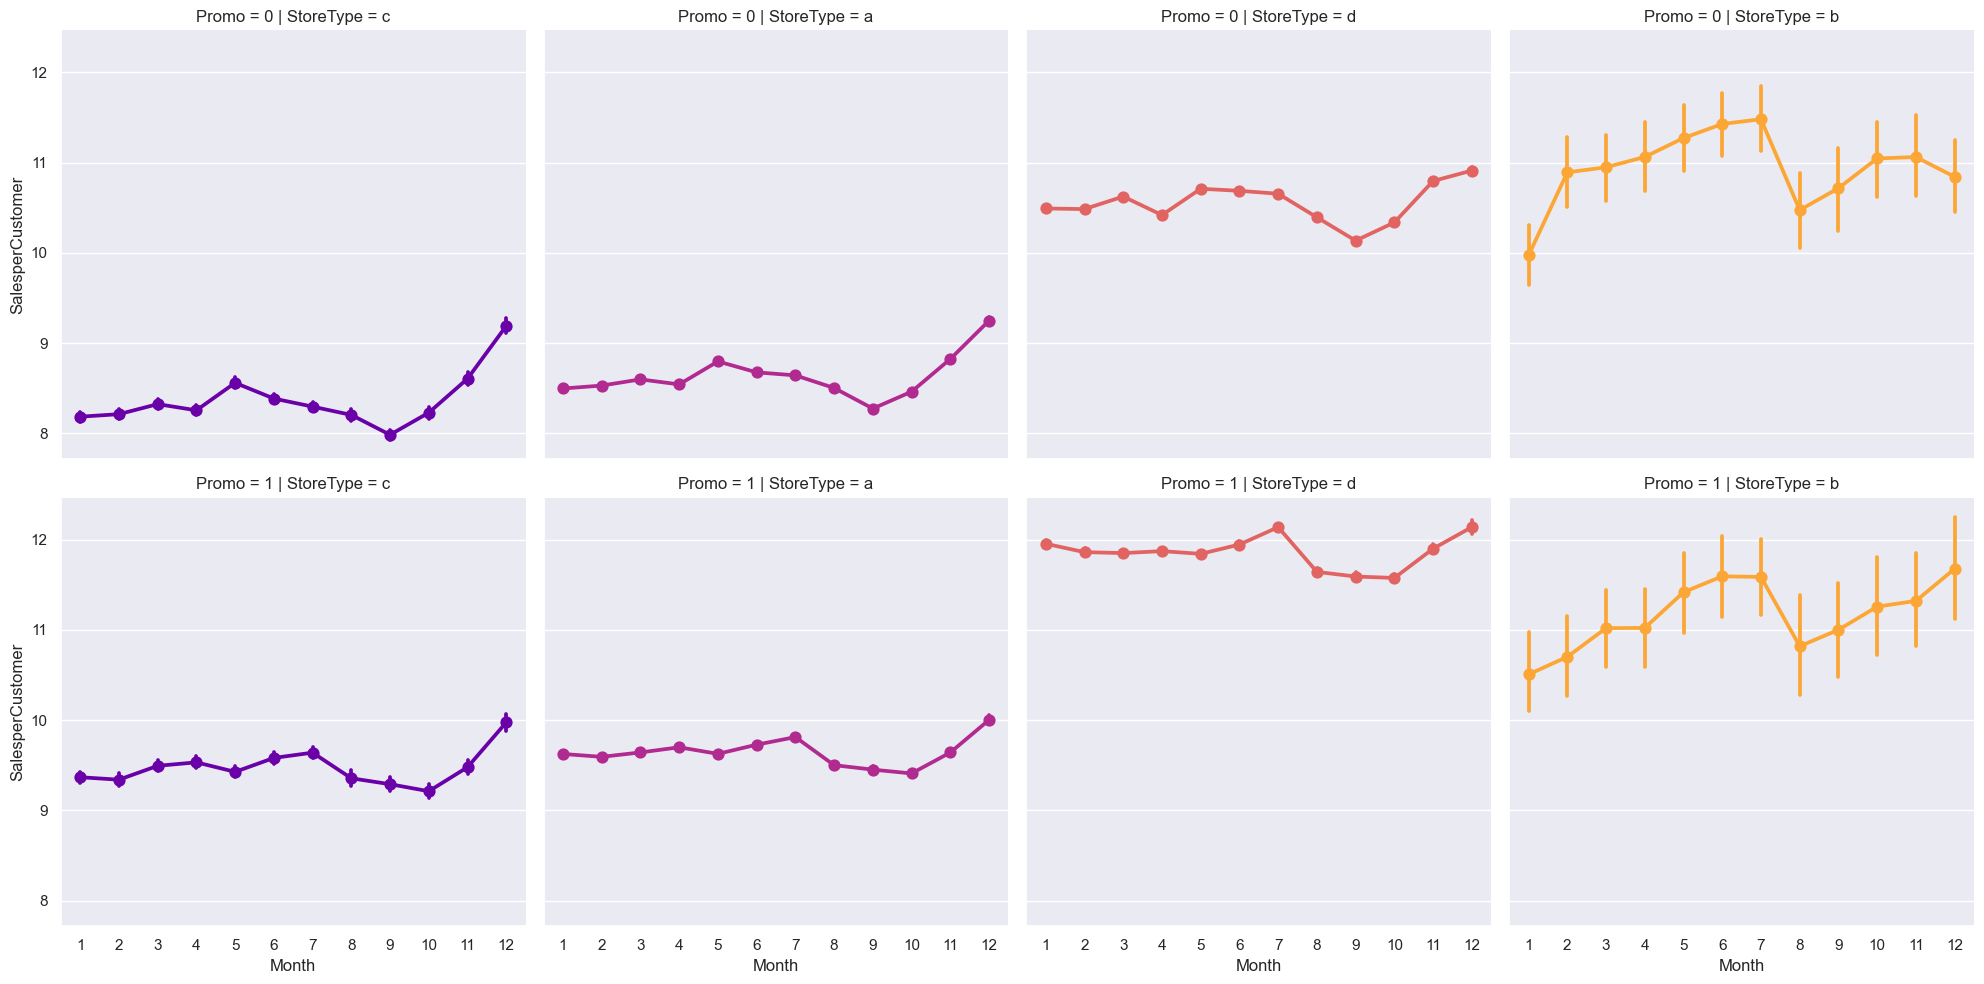

In [100]:
# sale per customer trends
c="green"
sns.factorplot(data = clean_trainScore_df, x = 'Month', y = "SalesperCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

In [101]:
clean_trainScore_df.head(25)

Store  DayOfWeek       Date   Sales  Customers  Open  Promo StateHoliday  \
0       1          5 2015-07-31  5263.0      555.0     1      1            0   
1       1          4 2015-07-30  5020.0      546.0     1      1            0   
2       1          3 2015-07-29  4782.0      523.0     1      1            0   
3       1          2 2015-07-28  5011.0      560.0     1      1            0   
4       1          1 2015-07-27  6102.0      612.0     1      1            0   
5       1          7 2015-07-26     0.0        0.0     0      0            0   
6       1          6 2015-07-25  4364.0      500.0     1      0            0   
7       1          5 2015-07-24  3706.0      459.0     1      0            0   
8       1          4 2015-07-23  3769.0      503.0     1      0            0   
9       1          3 2015-07-22  3464.0      463.0     1      0            0   
10      1          2 2015-07-21  3558.0      469.0     1      0            0   
11      1          1 2015-07-20  4395.0      526.0     1      0            0   
12      1          7 2015-07-19     0.0        0.0     0      0            0   
13      1          6 2015-07-18  4406.0      512.0     1      0            0   
14      1          5 2015-07-17  4852.0      519.0     1      1            0   
15      1          4 2015-07-16  4427.0      517.0     1      1            0   
16      1          3 2015-07-15  4767.0      550.0     1      1            0   
17      1          2 2015-07-14  5042.0      544.0     1      1            0   
18      1          1 2015-07-13  5054.0      553.0     1      1            0   
19      1          7 2015-07-12     0.0        0.0     0      0            0   
20      1          6 2015-07-11  3530.0      441.0     1      0            0   
21      1          5 2015-07-10  3808.0      449.0     1      0            0   
22      1          4 2015-07-09  3897.0      480.0     1      0            0   
23      1          3 2015-07-08  3797.0      485.0     1      0            0   
24      1          2 2015-07-07  3650.0      485.0     1      0            0   

    SchoolHoliday StoreType  ... PromoInterval  Day  Week  Month  Year  \
0               1         c  ...             0   31    31      7  2015   
1               1         c  ...             0   30    31      7  2015   
2               1         c  ...             0   29    31      7  2015   
3               1         c  ...             0   28    31      7  2015   
4               1         c  ...             0   27    31      7  2015   
5               0         c  ...             0   26    30      7  2015   
6               0         c  ...             0   25    30      7  2015   
7               0         c  ...             0   24    30      7  2015   
8               0         c  ...             0   23    30      7  2015   
9               0         c  ...             0   22    30      7  2015   
10              0         c  ...             0   21    30      7  2015   
11              0         c  ...             0   20    30      7  2015   
12              0         c  ...             0   19    29      7  2015   
13              0         c  ...             0   18    29      7  2015   
14              0         c  ...             0   17    29      7  2015   
15              0         c  ...             0   16    29      7  2015   
16              0         c  ...             0   15    29      7  2015   
17              0         c  ...             0   14    29      7  2015   
18              0         c  ...             0   13    29      7  2015   
19              0         c  ...             0   12    28      7  2015   
20              0         c  ...             0   11    28      7  2015   
21              0         c  ...             0   10    28      7  2015   
22              0         c  ...             0    9    28      7  2015   
23              0         c  ...             0    8    28      7  2015   
24              0         c  ...             0    7    28      7  2015   

### Effect of days of the week on sales by product type

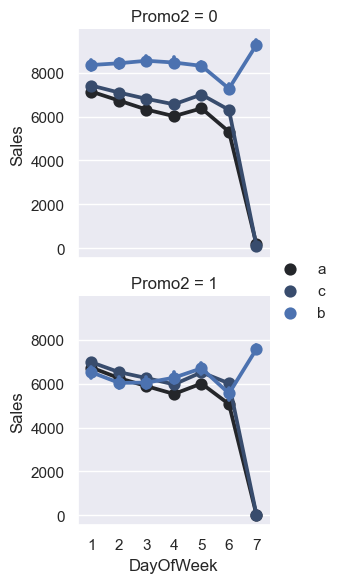

In [102]:
g=sns.FacetGrid(clean_trainScore_df, row="Promo2")
g.map(sns.pointplot, "DayOfWeek", "Sales", "Assortment")
g.add_legend()
plt.show()

Here we can see that the best selling products are type b products. We see that stores selling type B products are open on Sundays, while stores selling other products are closed on Sundays.

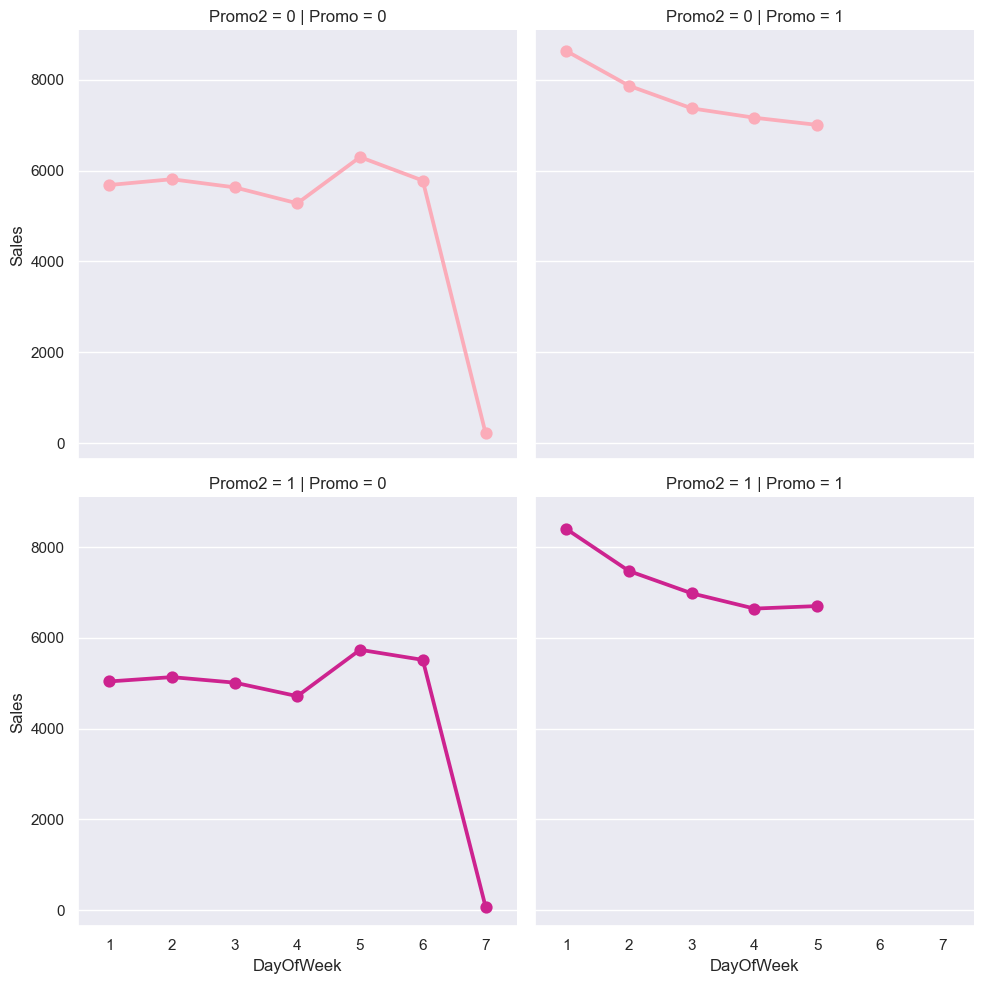

In [103]:
# DayOfWeek vs Sales
sns.factorplot(data = clean_trainScore_df, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to down on Sunday (!).
On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good - indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above

### Distribution of sales when there is a campaign and when there is no campaign

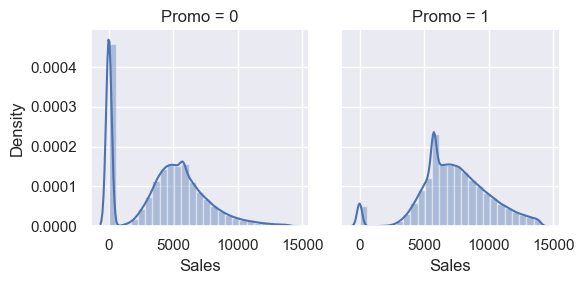

In [104]:
g=sns.FacetGrid(clean_trainScore_df, col="Promo")
g.map(sns.distplot, "Sales", bins=25)
plt.show()

1. Sales density and average increase in the campaign organized by the store itself.

### examine the effect of categorical and numerical variables on the dependent variable:

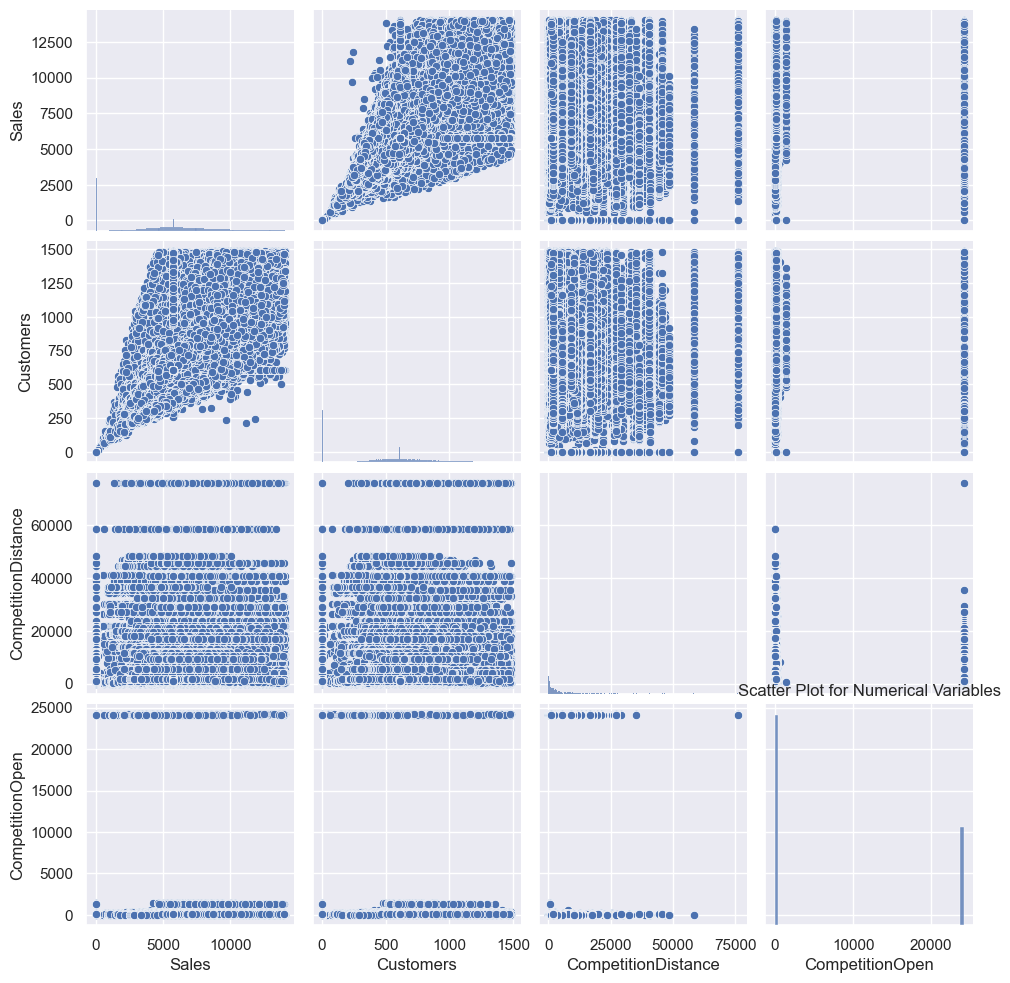

In [105]:
nc=["Customers","CompetitionDistance","CompetitionOpen","PromoOpen","SalesPerCustomer"] # numerical
kc=["DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Open","Promo","Promo2","Week","Month","Year","Season","PromoInterval"] # category
sns.pairplot(clean_trainScore_df[["Sales","Customers","CompetitionDistance","CompetitionOpen"]])
plt.title("Scatter Plot for Numerical Variables")
plt.show()

We see that there is a positive correlation between customers and sales. Other variables do not appear to be related to the dependent variable. We'll see when we do the correlation analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

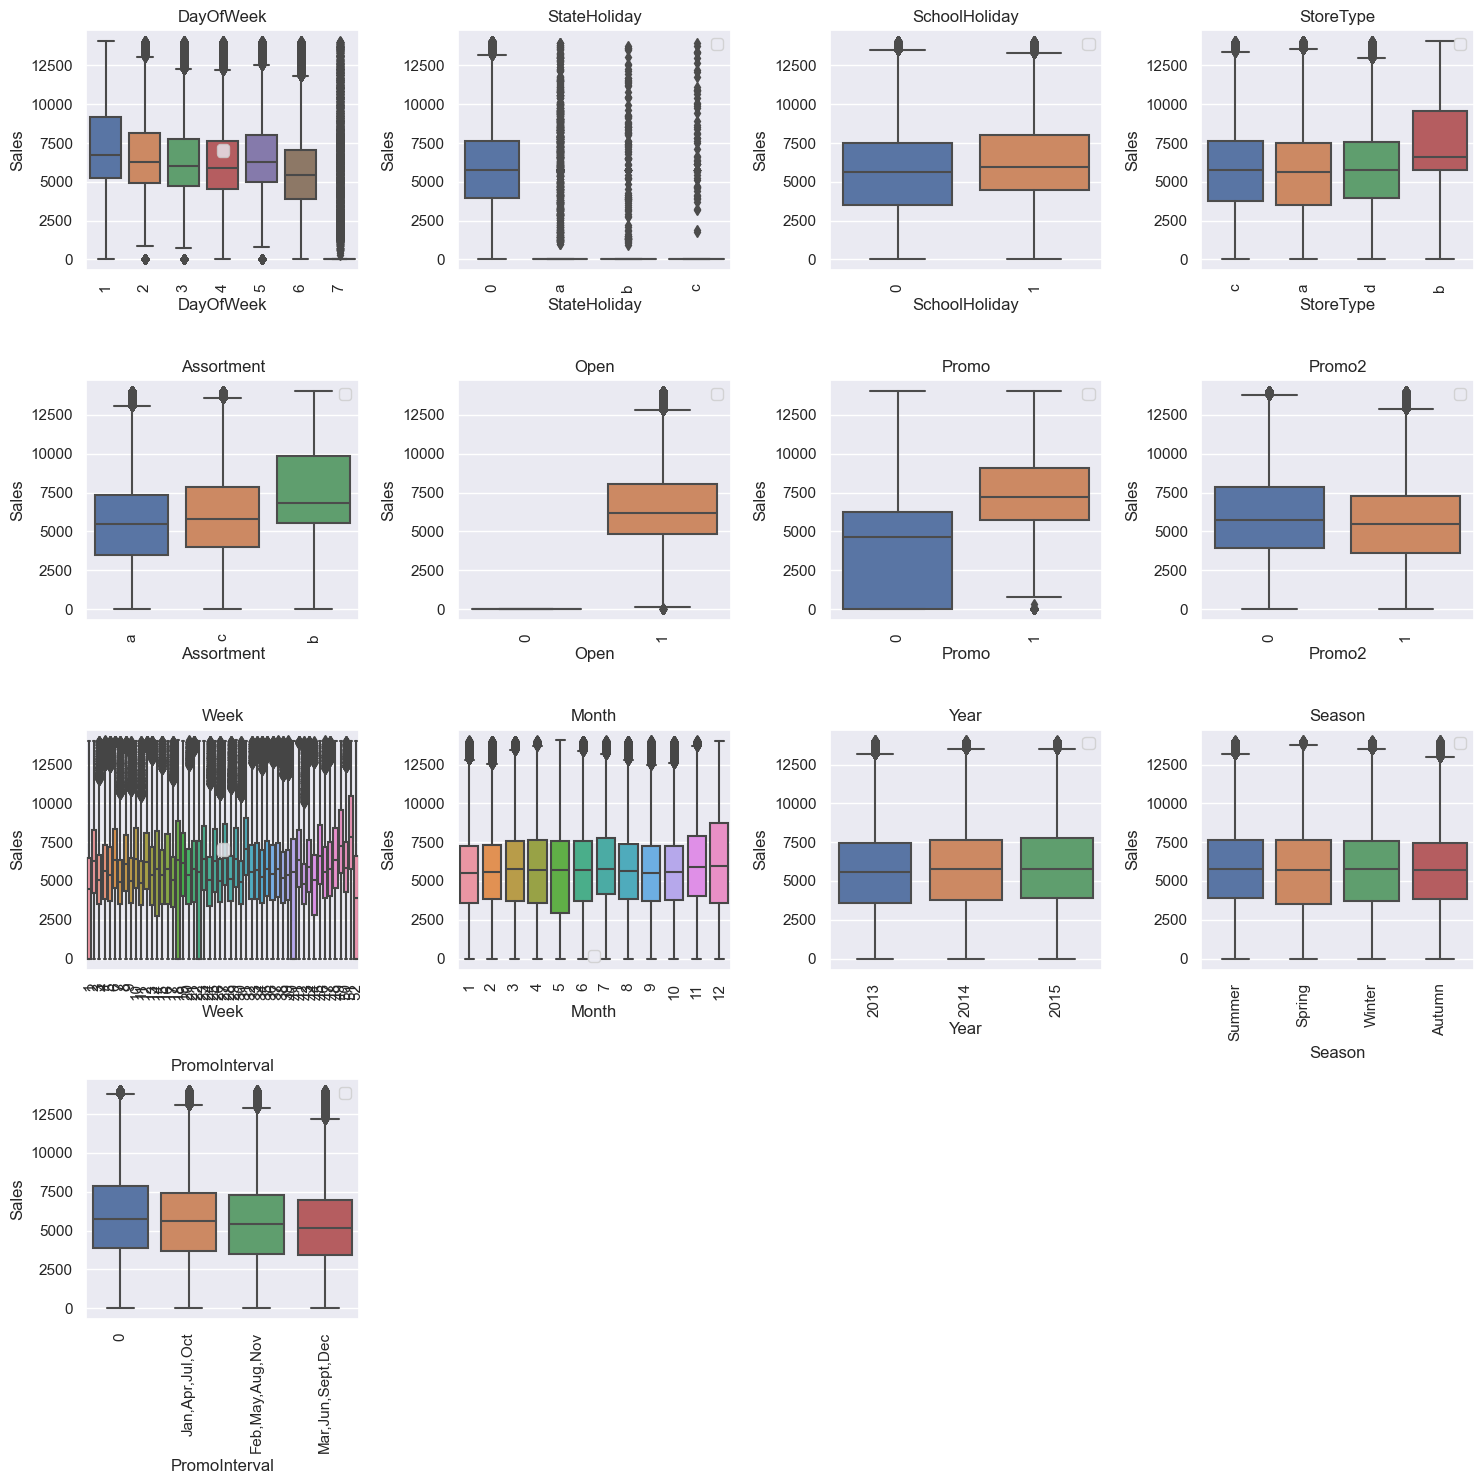

In [106]:
m={0:"0","0":"0","a":"a","b":"b","c":"c"}
clean_trainScore_df["StateHoliday"]=clean_trainScore_df["StateHoliday"].map(m)
plt.figure(figsize=(15,15))
for ax, col in enumerate(kc):
    plt.subplot(4,4, ax+1)
    plt.title(col)
    sns.boxplot(x=col, y="Sales", data=clean_trainScore_df)
    plt.xticks(rotation=90)
    plt.legend()

plt.tight_layout()

## correlation Analysis

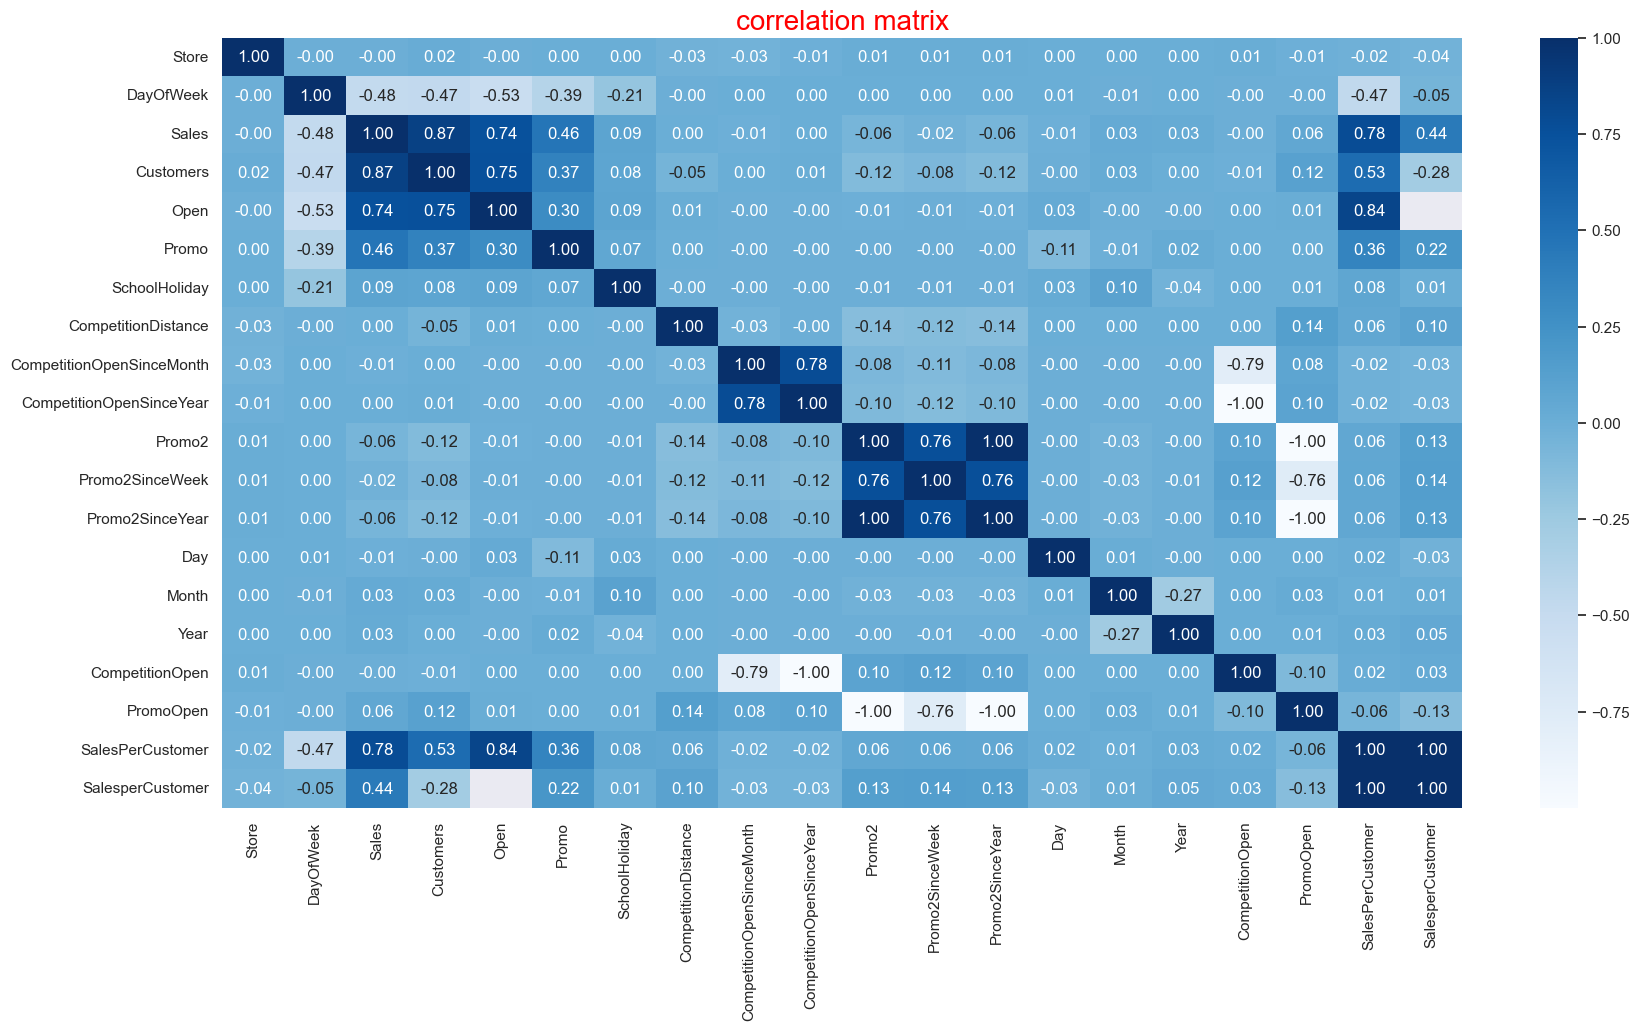

In [107]:
# correlation analysis
df_corr=clean_trainScore_df.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(20,10))
plt.title("correlation matrix", color="red", fontsize=20)
sns.heatmap(df_corr,annot=True,cmap="Blues", fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

In [108]:
df_correlation=clean_trainScore_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]

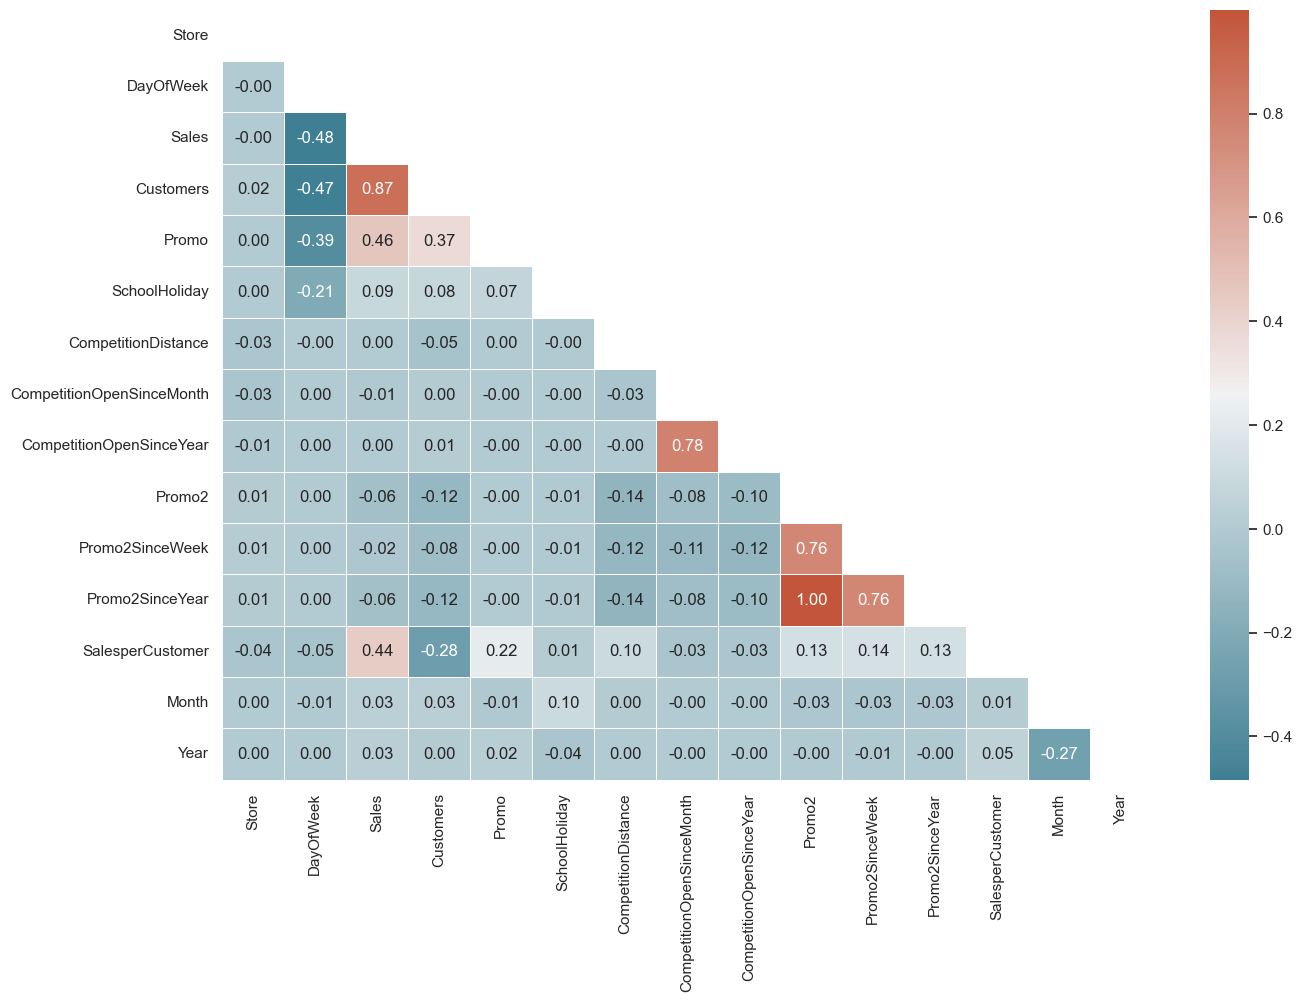

In [109]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype=bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_correlation.corr(), ax=ax, mask=upper_triangle, annot=True, fmt='.2f', linewidths=0.5, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

####  Some Observation

1. The number of Customers and Sales have strong relation
2. Positive correlation between the store had a running promotion (Promo equal to 1) and amount of Customers.
3. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.
4. Salesper customer have high co relation

In [110]:
clean_trainScore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
CompetitionOpen                   0
PromoOpen                         0
SalesPerCustomer                  0
SalesperCustomer             172869
dtype: int64

In [111]:
#filling the null value of SalesperCustomer
clean_trainScore_df.SalesperCustomer.fillna(0, inplace = True)

In [112]:
clean_trainScore_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
CompetitionOpen              0
PromoOpen                    0
SalesPerCustomer             0
SalesperCustomer             0
dtype: int64

In [113]:
#Saving clean dataframe in to csv file for future task 
clean_trainScore_df.to_csv('clean_trainScore.csv', index=False)

### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

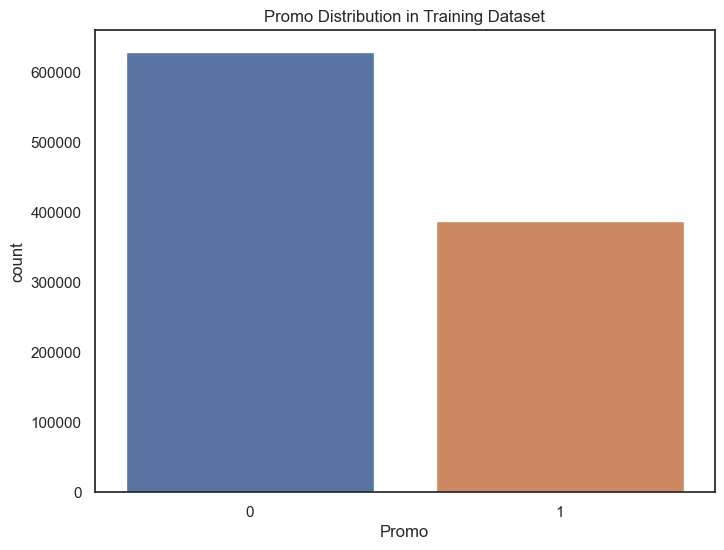

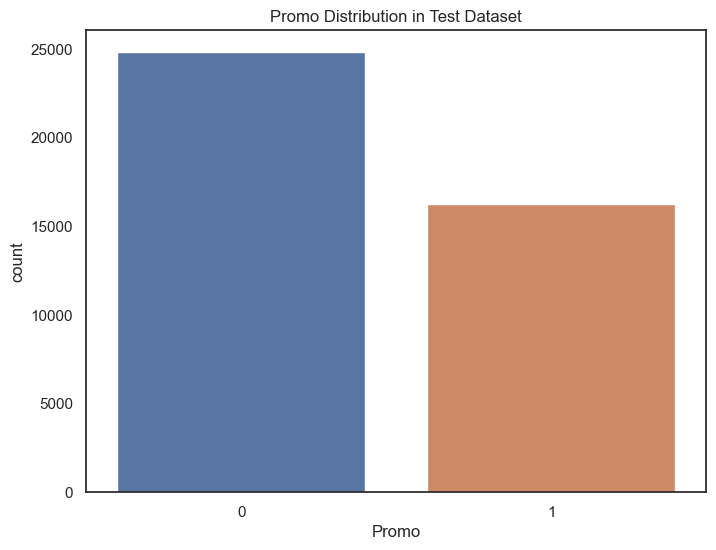

In [114]:
# Plotting 'Promo' distribution in the training dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=clean_trainScore_df, x='Promo')
plt.title('Promo Distribution in Training Dataset')

plt.show()

# Plotting 'Promo' distribution in the test dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='Promo')
plt.title('Promo Distribution in Test Dataset')

plt.show()

In [115]:
clean_trainScore=clean_trainScore_df.copy()

### Check & compare sales behavior before, during and after holidays

In [116]:
# Converting '0' to integer in 'StateHoliday' column
clean_trainScore['StateHoliday'] = clean_trainScore['StateHoliday'].replace({'0': 0})

# Mapping other values for better interpretation
clean_trainScore['StateHoliday'] = clean_trainScore['StateHoliday'].replace({0: 'No Holiday','a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})


In [117]:
# Calculateing mean sales for each StateHoliday
holiday_sales = clean_trainScore.groupby('StateHoliday')['Sales'].mean().reset_index()


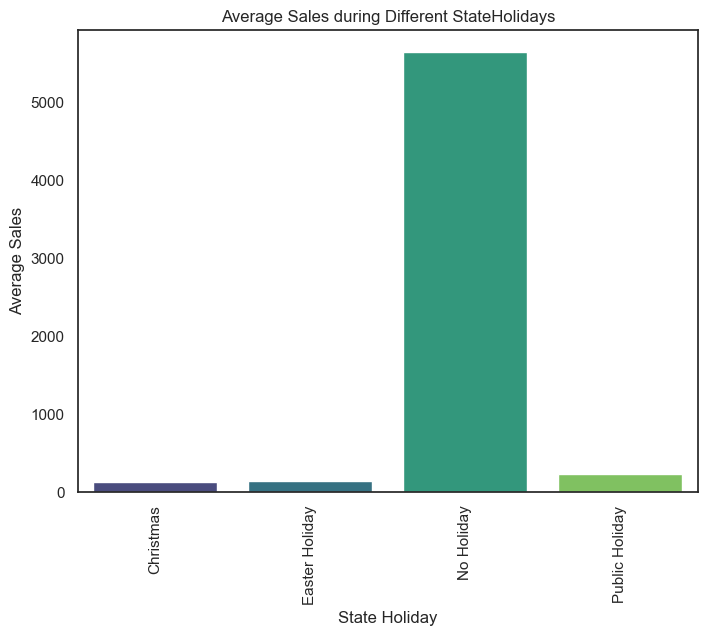

In [118]:
# Plotting sales behavior for each StateHoliday 
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_sales, x='StateHoliday', y='Sales', palette='viridis')
plt.title('Average Sales during Different StateHolidays')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

### Answer by above barplot:
observing the state holiday of public holiday, Easter Holiday, christmas and no holiday

There is a very low purchase frequency during holidays high sales after holidaies

### Find out any seasonal (Christmas, Easter etc) purchase behaviours,

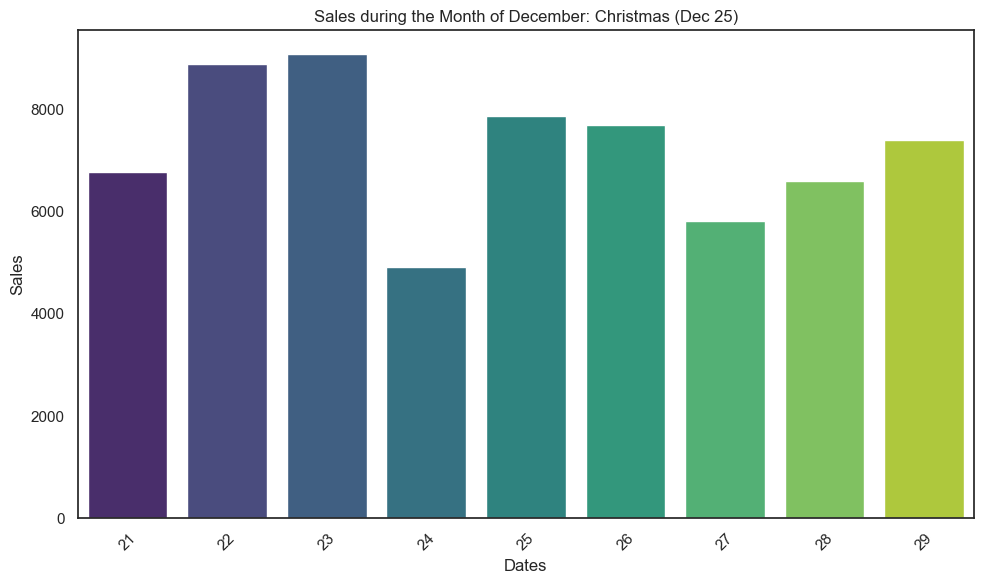

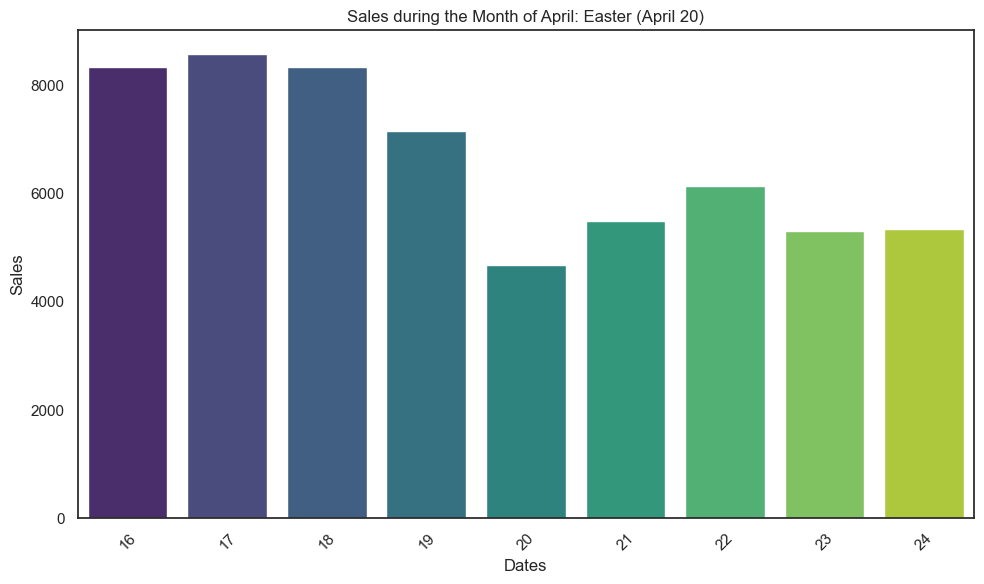

In [119]:
open_store = clean_trainScore[(clean_trainScore.Open == 1) & (clean_trainScore.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

# Plotting Sales around Christmas (December 25) using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=around_christmas.index, y=around_christmas['Sales'], palette='viridis')
plt.title('Sales during the Month of December: Christmas (Dec 25)')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Plotting Sales around Easter (April 20) using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=around_eastern.index, y=around_eastern['Sales'], palette='viridis')
plt.title('Sales during the Month of April: Easter (April 20)')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the bar plots, it's evident that sales surge before both holidays. Post-holidays, Easter exhibits increased sales, whereas Christmas maintains consistent, robust sales on the day itself. Sales are relatively higher on Christmas but comparatively lower on Easter during the holiday itself.

### What can you say about the correlation between sales and number of customers?

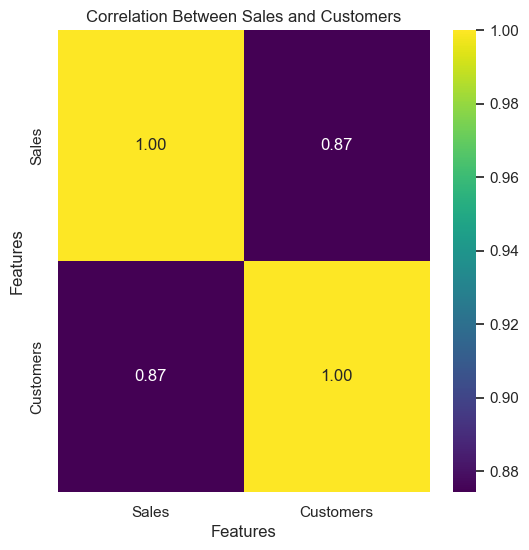

In [120]:
# Calculate the correlation matrix
correlation_matrix = clean_trainScore[['Sales', 'Customers']].corr()

# Plotting the heatmap 
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Between Sales and Customers')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

The sales and customer figures show a positive correlation, indicating that as the number of customers increases, so does the sales volume.

### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers

<Figure size 1200x700 with 0 Axes>

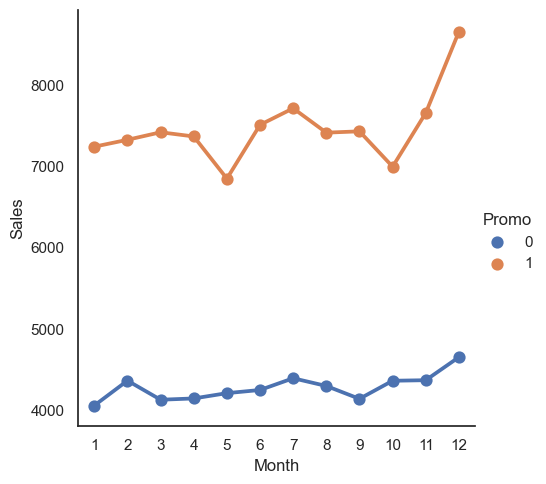

In [121]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Sales",
               hue = 'Promo',
              sharex=False)

<Figure size 1200x700 with 0 Axes>

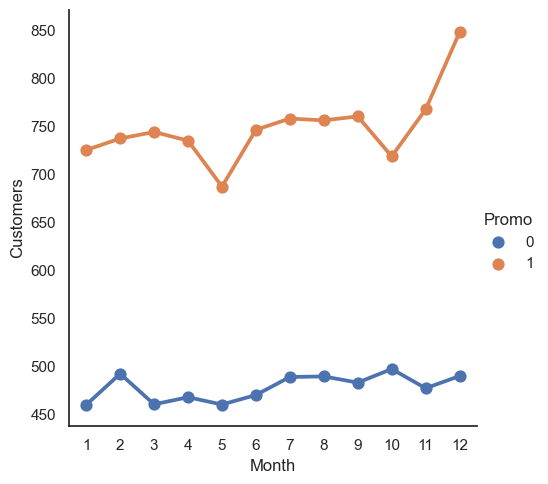

In [122]:
plt.figure(figsize=(12,7))
sns.factorplot(data = clean_trainScore, x ="Month", y = "Customers",
               hue = 'Promo',
              sharex=False)

The graph above illustrates that engaging in promotions correlates with an increase in both sales and customer numbers

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [123]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
        
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        plt.show()

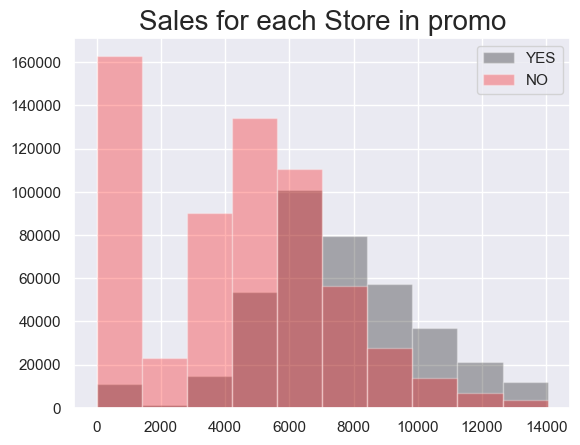

In [124]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo'] == 1], clean_trainScore[clean_trainScore['Promo'] == 0], 
                  'Sales', 'Sales', 'Sales for each Store in promo', 'YES', 'NO')

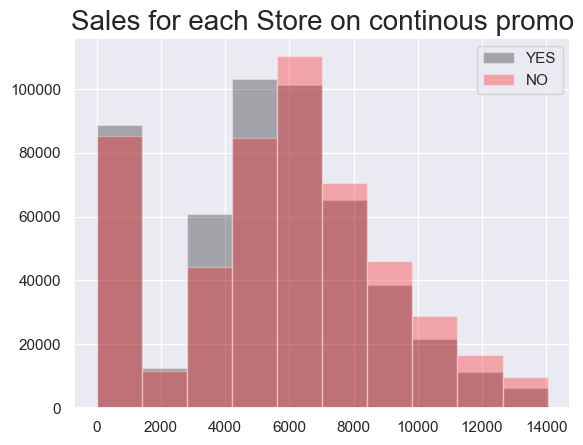

In [125]:
plot_hist_2d(clean_trainScore[clean_trainScore['Promo2'] == 1], clean_trainScore[clean_trainScore['Promo2'] == 0], 'Sales', 
                  'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

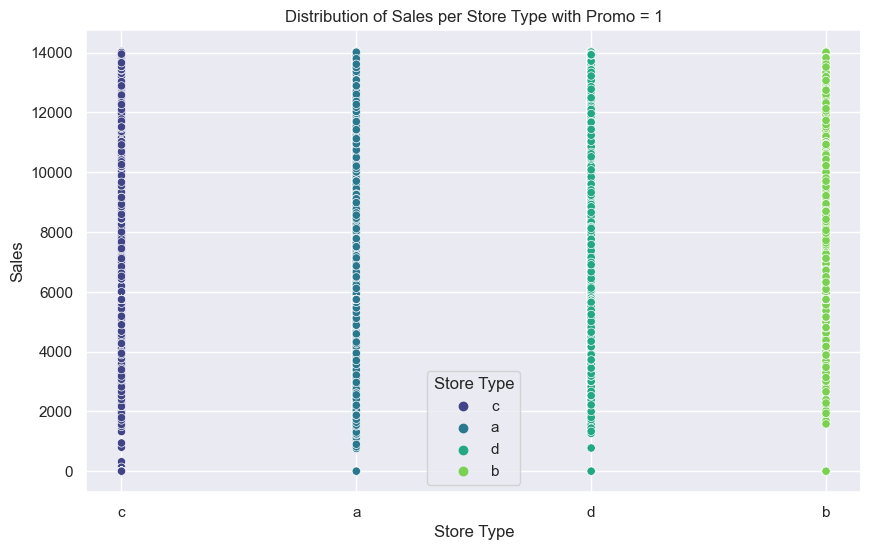

In [126]:
# Filter data for stores with Promo = 1
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 1]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_1, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

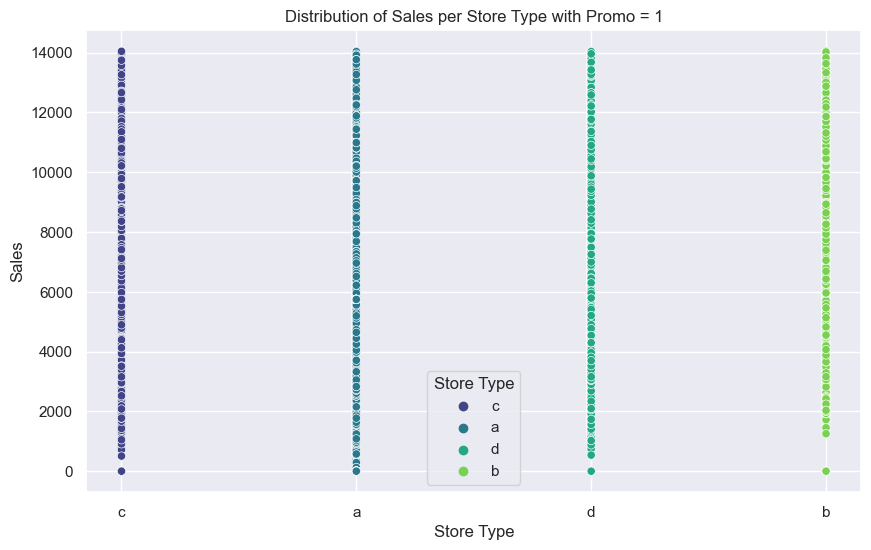

In [127]:
# Filter data for stores with Promo = 0
promos_1 = clean_trainScore[clean_trainScore['Promo'] == 0]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_1, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

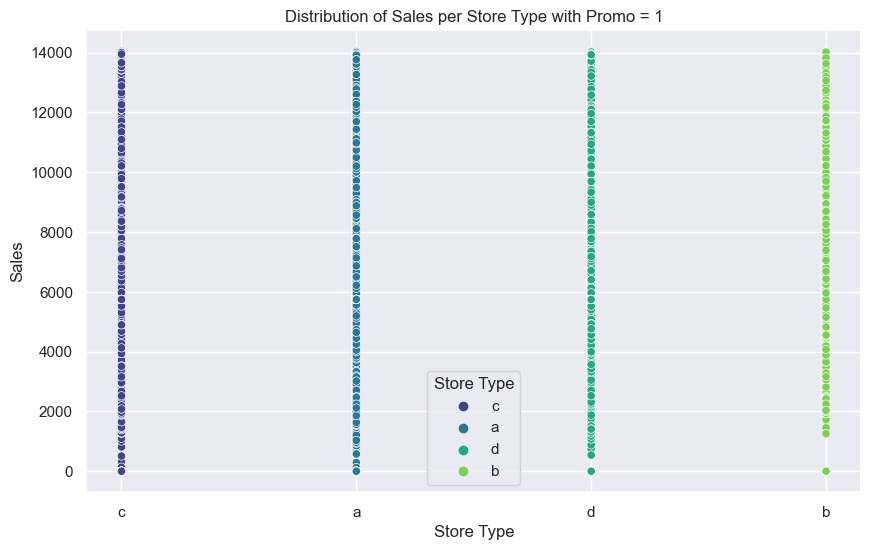

In [128]:
# Filter data for stores with Promo2 = 0
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 0]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_2, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

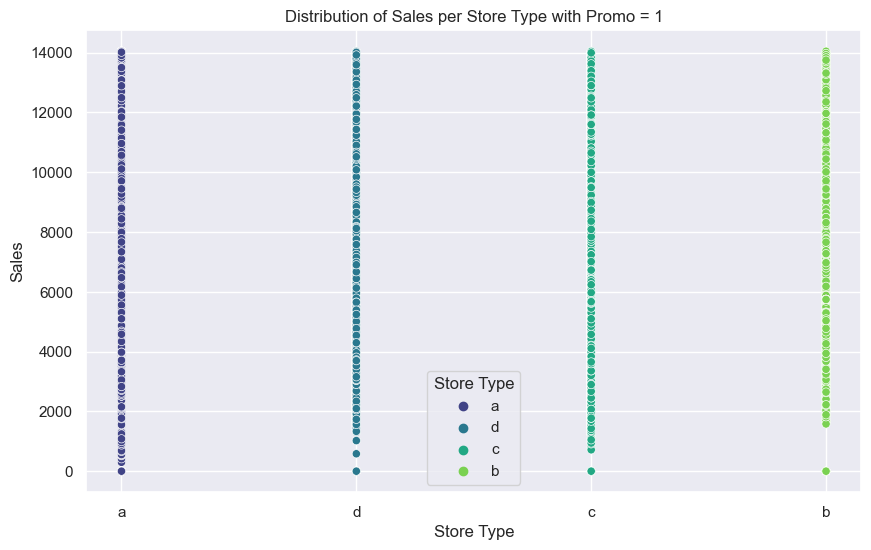

In [129]:
# Filter data for stores with Promo2 = 1
promos_2 = clean_trainScore[clean_trainScore['Promo2'] == 1]

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=promos_2, x='StoreType', y='Sales', hue='StoreType', palette='viridis')
plt.title('Distribution of Sales per Store Type with Promo = 1')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend(title='Store Type')
plt.show()

### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [130]:
open_stores = clean_trainScore.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')
each_day = open_stores[['StoreType', 'Sales','DayOfWeek']].groupby('StoreType').nunique()
each_day.head()

Sales  DayOfWeek
StoreType                  
a          12478          5
b           5960          5
c          11554          5
d          11968          5

In [131]:
open_store = clean_trainScore.query('Open == 1 and DayOfWeek > 5 or DayOfWeek < 1')
each_day1 = open_store[['StoreType','Sales', 'DayOfWeek']].groupby('StoreType').nunique()
each_day1.head()

Sales  DayOfWeek
StoreType                  
a          11288          2
b           3081          2
c           7855          1
d           9221          2

The observation reveals that stores operate throughout the weekdays. Certain stores exhibit lower sales ('b'), while Store A notably generates higher revenue on weekends. This trend suggests a significant impact of weekend sales on overall income

### Check how the assortment type affects sales

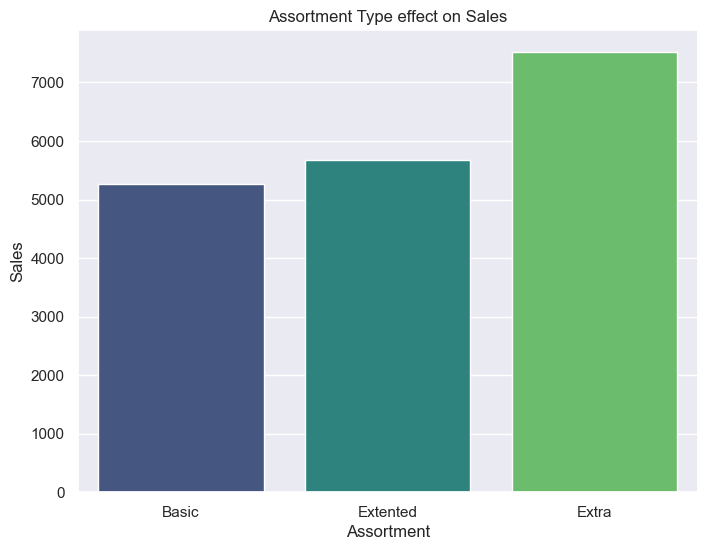

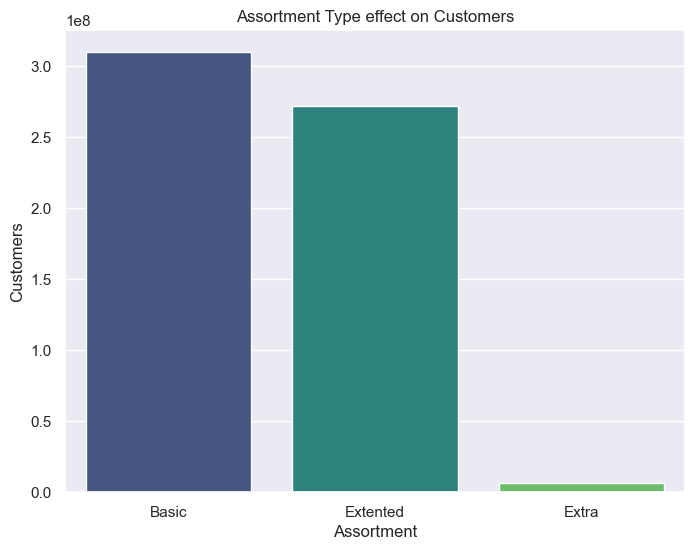

Assortment        Sales    Customers
0      Basic  5257.261967  309955818.0
1   Extented  5682.692067  272014728.0
2      Extra  7515.126598    6331579.0

In [132]:
temp_df = clean_trainScore.copy()
# Mapping Assortment types to specific names
assortment_names = {'a': 'Basic', 'b': 'Extra', 'c': 'Extented'}
temp_df['Assortment'] = temp_df['Assortment'].map(assortment_names)

# Grouping and aggregating data for Sales and Customers by Assortment types
assortment_agg = temp_df.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()

# Plotting Assortment Type effect on Sales using Seaborn with named categories
plt.figure(figsize=(8, 6))
sns.barplot(data=assortment_agg, x='Assortment', y='Sales', palette='viridis')
plt.title('Assortment Type effect on Sales')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.show()

# Plotting Assortment Type effect on Customers using Seaborn with named categories
plt.figure(figsize=(8, 6))
sns.barplot(data=assortment_agg, x='Assortment', y='Customers', palette='viridis')
plt.title('Assortment Type effect on Customers')
plt.xlabel('Assortment')
plt.ylabel('Customers')
plt.show()

assortment_agg

The stores with extra assortment type have high mean sales and lowest customer numbers.

### 	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

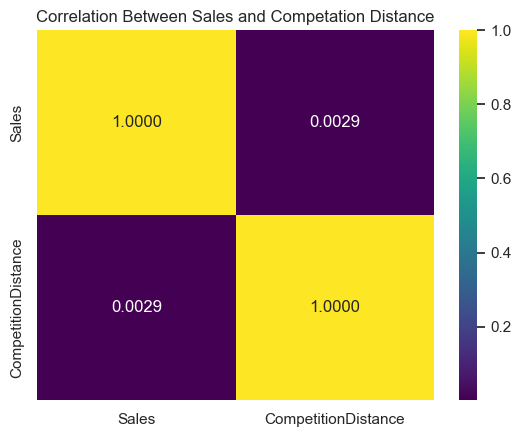

In [133]:
# sales Vs competitioDistance
columns = clean_trainScore[['Sales', 'CompetitionDistance']]
correlation_matrix = columns.corr()

sns.heatmap(correlation_matrix,annot=True, cmap='viridis',fmt='.4f')
plt.title('Correlation Between Sales and Competation Distance')
plt.show()

As store proximity increases, sales tend to rise, whereas greater distance correlates with lower sales

### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [134]:
# checking uniqueness
clean_trainScore["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

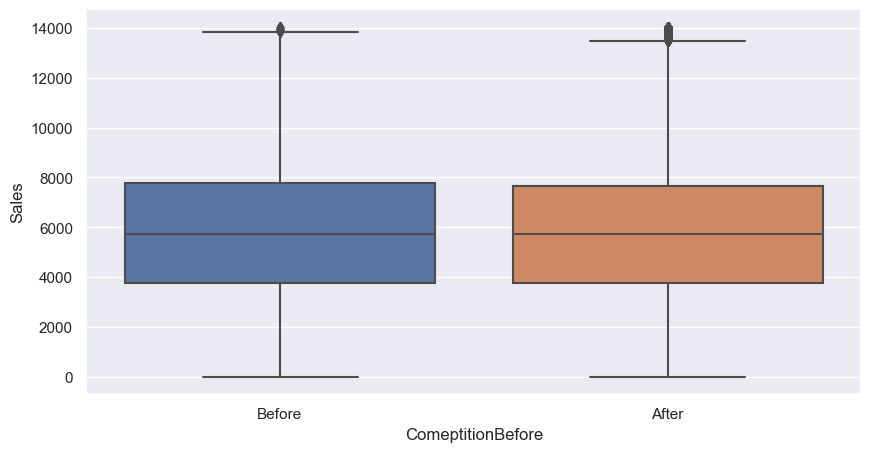

In [135]:
has_open_competition_df = clean_trainScore[clean_trainScore['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")


sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < 
                                                         has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                        (has_open_competition_df["Month"] < 
                                                         has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceYear"]) & 
                                                       (has_open_competition_df["Month"] >= 
                                                        has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_before_competition_open["ComeptitionBefore"]="Before"
sales_after_competition_open["ComeptitionBefore"]="After"

competition_sales_data=pd.concat([sales_before_competition_open,sales_after_competition_open])

plt.figure(figsize=(10, 5))
sns.boxplot(x='ComeptitionBefore', y='Sales', data=competition_sales_data);

### Summary of the EDA on the Time Series Data
1. The most selling and crowded StoreType is A.
2. The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
3. Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
4. Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
5. Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

# Task 1.2 Logging

In [136]:
import logging

In [137]:
logging.basicConfig(filename='PharmaceuticalSalesLogger',level=logging.INFO,
                   format='%(asctime)s - %(levelname)s - %(message)s',datefmt='%d-%b-%y $H:%M:%S')

In [138]:
logger = logging.getLogger()

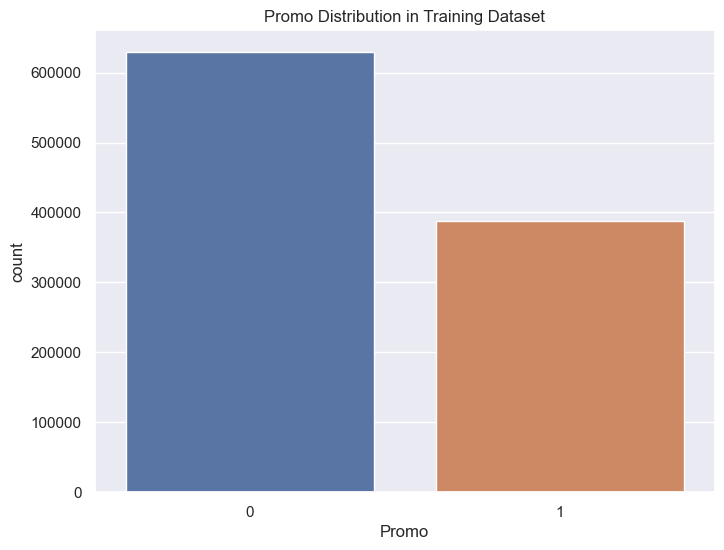

<Figure size 800x600 with 0 Axes>

In [139]:
# Configure the logger
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')

# Get the logger
logger = logging.getLogger()

# Plotting 'Promo' distribution in the training dataset
try:
    logger.info('Plotting Promo distribution in the training dataset...')
    plt.figure(figsize=(8, 6))
    sns.countplot(data=clean_trainScore_df, x='Promo')
    plt.title('Promo Distribution in Training Dataset')
    plt.show()
    logger.info('Plotting completed: Promo distribution in the training dataset.')
except Exception as e:
    logger.error(f'Error plotting Promo distribution in the training dataset: {e}')

# Plotting 'Promo' distribution in the test dataset
try:
    logger.info('Plotting Promo distribution in the test dataset...')
    plt.figure(figsize=(8, 6))
    sns.countplot(data=test, x='Promo')
    plt.title('Promo Distribution in Test Dataset')
    plt.show()
    logger.info('Plotting completed: Promo distribution in the test dataset.')
except Exception as e:
    logger.error(f'Error plotting Promo distribution in the test dataset: {e}')

In [140]:
# Function to convert values in 'StateHoliday' column
def convert_state_holiday_column(data):
    try:
        logger.info('Converting values in StateHoliday column...')
        # Converting '0' to integer
        data['StateHoliday'] = data['StateHoliday'].replace({'0': 0})
        # Mapping other values for better interpretation
        data['StateHoliday'] = data['StateHoliday'].replace({0: 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})
        logger.info('Values converted in StateHoliday column.')
    except Exception as e:
        logger.error(f'Error converting values in StateHoliday column: {e}')

# Example usage with clean_trainScore dataframe
convert_state_holiday_column(clean_trainScore)

In [141]:
# Calculateing mean sales for each StateHoliday
holiday_sales = clean_trainScore.groupby('StateHoliday')['Sales'].mean().reset_index()

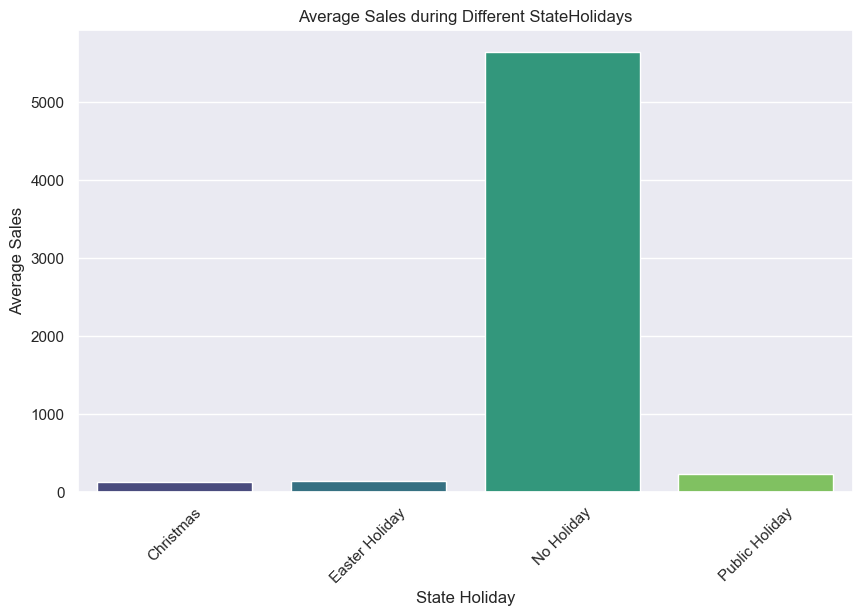

In [142]:
def plot_sales_behavior(data):
    try:
        logger.info('Plotting sales behavior for each StateHoliday...')
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x='StateHoliday', y='Sales', palette='viridis')
        plt.title('Average Sales during Different StateHolidays')
        plt.xlabel('State Holiday')
        plt.ylabel('Average Sales')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()
        logger.info('Sales behavior plotted for each StateHoliday.')
    except Exception as e:
        logger.error(f'Error plotting sales behavior for each StateHoliday: {e}')

# Example usage with holiday_sales dataframe
plot_sales_behavior(holiday_sales)

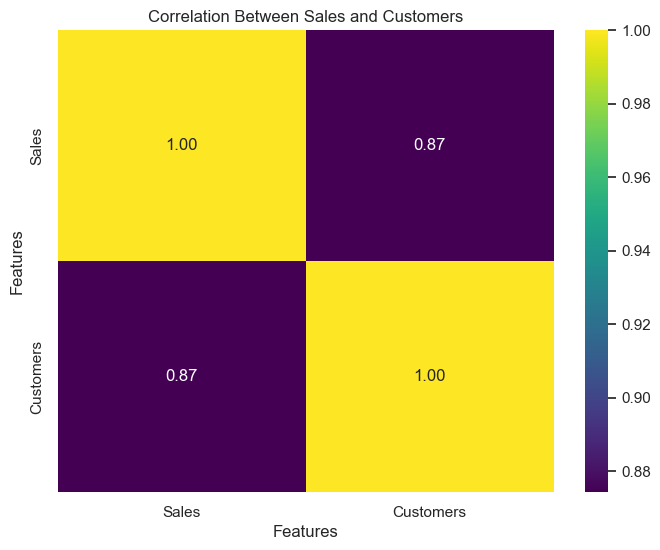

In [143]:
try:
    # Calculate the correlation matrix
    logger.info('Calculating the correlation matrix...')
    correlation_matrix = clean_trainScore[['Sales', 'Customers']].corr()
    logger.info('Correlation matrix calculated.')

    # Plotting the heatmap
    logger.info('Plotting the heatmap...')
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Correlation Between Sales and Customers')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()
    logger.info('Heatmap plotted: Correlation between Sales and Customers.')
except Exception as e:
    logger.error(f'Error: {e}')

<Figure size 1200x700 with 0 Axes>

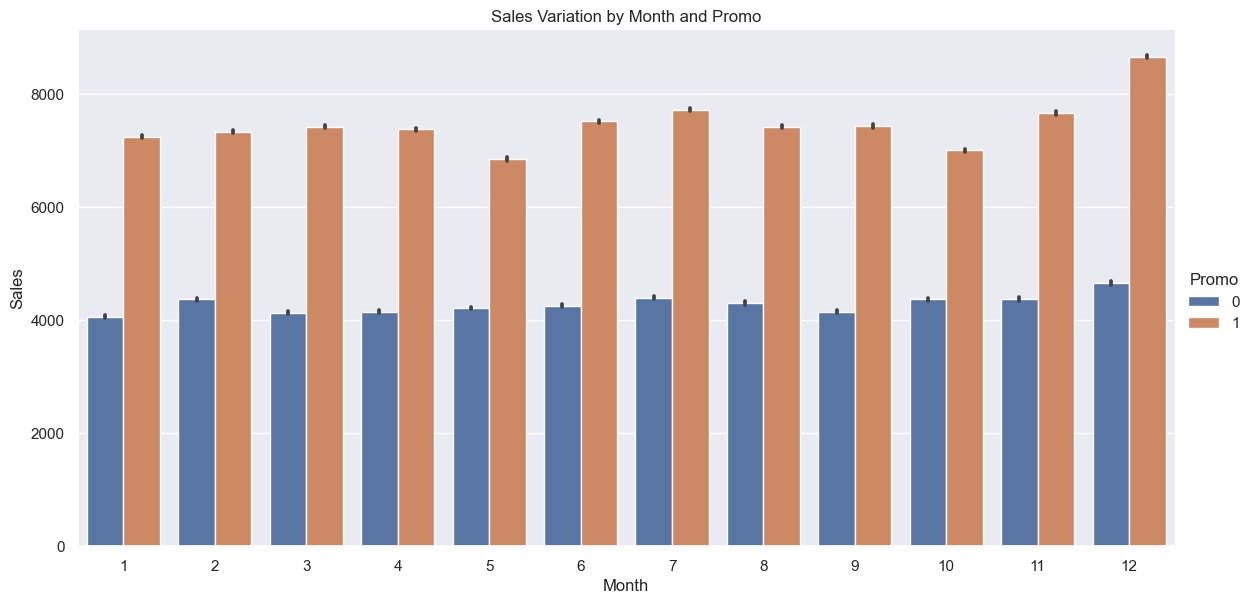

In [144]:
try:
    logger.info('Creating a factor plot for Sales based on Month and Promo...')
    plt.figure(figsize=(12, 7))
    sns.catplot(data=clean_trainScore, x="Month", y="Sales", hue='Promo', kind='bar', height=6, aspect=2)
    plt.title('Sales Variation by Month and Promo')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()
    logger.info('Factor plot created for Sales based on Month and Promo.')
except Exception as e:
    logger.error(f'Error creating factor plot: {e}')

In [145]:
def plot_hist_2d(df1: pd.DataFrame, df2: pd.DataFrame, x_col: str, y_col: str, title: str, label1, label2) -> None:
    try:
        logger.info(f'Creating 2D histogram for {x_col} and {y_col}...')
        sns.set()
        plt.hist(df1[x_col], color='black', alpha=0.3, label=label1)
        plt.hist(df2[y_col], color='red', alpha=0.3, label=label2)
        plt.legend()
        plt.plot()
        plt.title(title, size=20)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
        logger.info(f'2D histogram for {x_col} and {y_col} created.')
    except Exception as e:
        logger.error(f'Error creating 2D histogram: {e}')

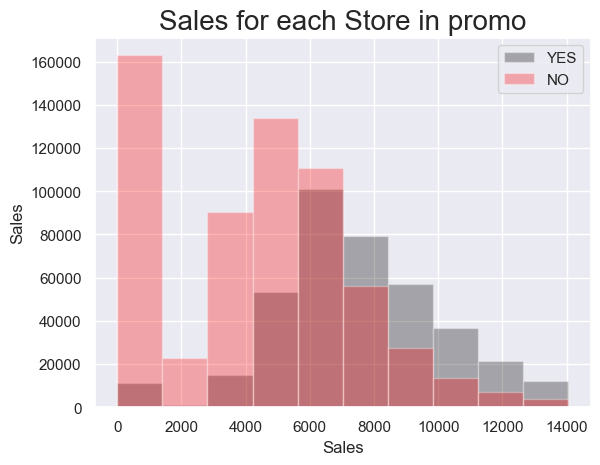

In [146]:
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')

plot_hist_2d(clean_trainScore[clean_trainScore['Promo'] == 1], clean_trainScore[clean_trainScore['Promo'] == 0], 
                  'Sales', 'Sales', 'Sales for each Store in promo', 'YES', 'NO')

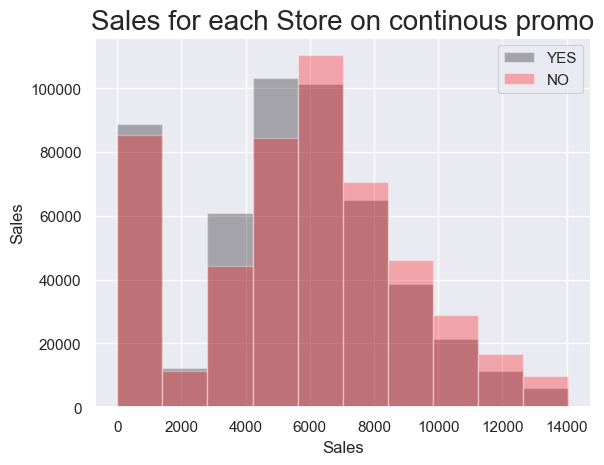

In [147]:
logging.basicConfig(filename='PharmaceuticalSalesLogger.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    datefmt='%d-%b-%y')


plot_hist_2d(clean_trainScore[clean_trainScore['Promo2'] == 1], clean_trainScore[clean_trainScore['Promo2'] == 0], 'Sales', 
                  'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')

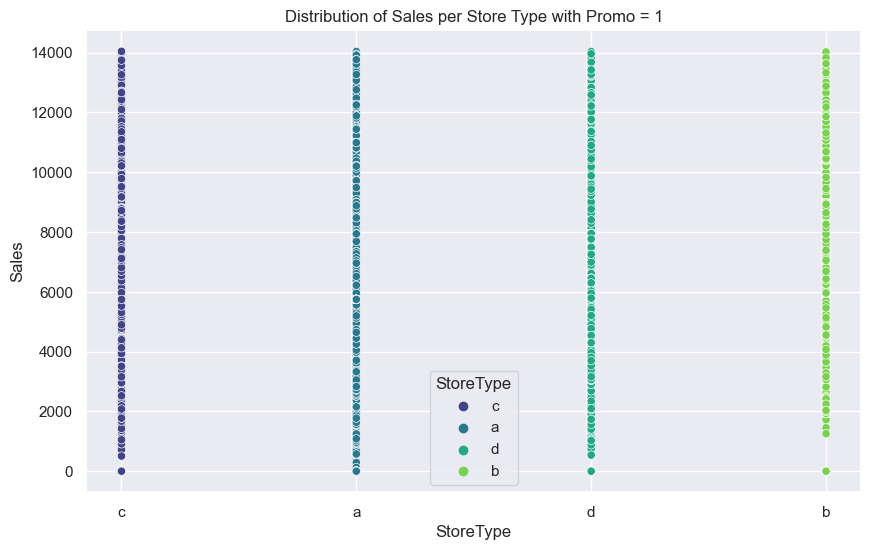

In [148]:
def plot_scatter_with_promo(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')


        promos_1 = clean_trainScore[clean_trainScore['Promo'] == 1]
plot_scatter_with_promo(promos_1, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo = 1')

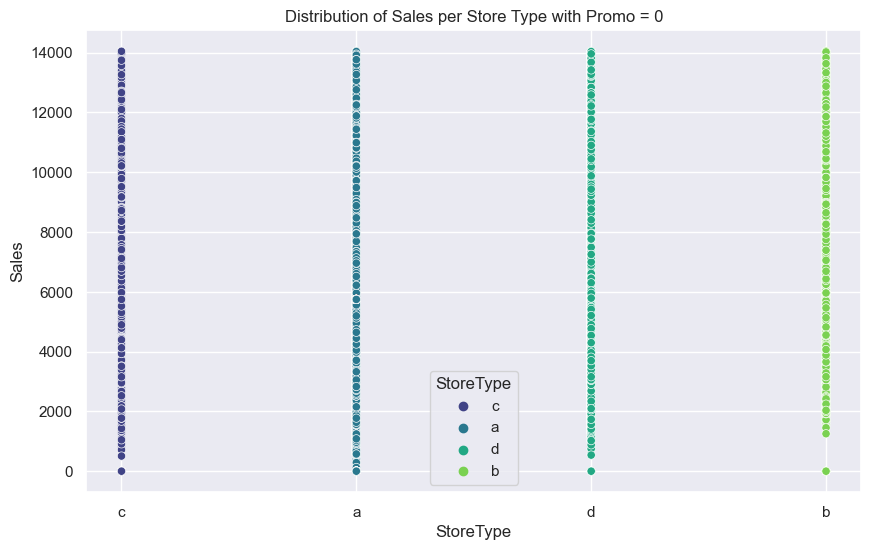

In [149]:
def plot_scatter_without_promo(data, x_col, y_col, hue_col, title):
    try:
        logger.info(f'Creating scatterplot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Scatterplot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating scatterplot: {e}')
promos_0 = clean_trainScore[clean_trainScore['Promo'] == 0]
plot_scatter_without_promo(promos_0, 'StoreType', 'Sales', 'StoreType', 'Distribution of Sales per Store Type with Promo = 0')

<Figure size 1000x800 with 0 Axes>

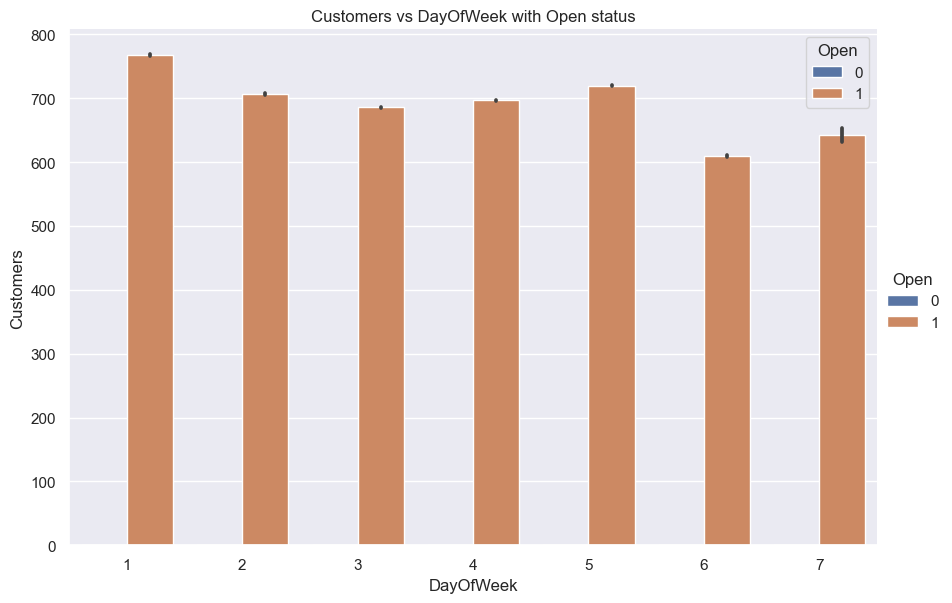

In [150]:
def plot_factor_customers_day_open(data, x_col, y_col, hue_col, title):
           
    try:
        logger.info(f'Creating factor plot for {y_col} vs {x_col} with hue {hue_col}...')
        plt.figure(figsize=(10, 8))
        sns.catplot(data=data, x=x_col, y=y_col, hue=hue_col, kind='bar', height=6, aspect=1.5)
        plt.title(title)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend(title=hue_col)
        plt.show()
        logger.info(f'Factor plot created for {y_col} vs {x_col} with hue {hue_col}.')
    except Exception as e:
        logger.error(f'Error creating factor plot: {e}')


plot_factor_customers_day_open(clean_trainScore, 'DayOfWeek', 'Customers', 'Open', 'Customers vs DayOfWeek with Open status')

In [151]:
try:
    logger.info('Performing query and aggregation for each_day...')
    open_stores = clean_trainScore.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')
    each_day = open_stores[['StoreType', 'Sales', 'DayOfWeek']].groupby('StoreType').nunique()
    logger.info('Query and aggregation for each_day completed.')
    logger.info(f'each_day: \n{each_day.head()}')  # Logging the resulting DataFrame head
except Exception as e:
    logger.error(f'Error performing query and aggregation for each_day: {e}')

In [152]:
try:
    logger.info('Performing query and aggregation for each_day1...')
    open_store = clean_trainScore.query('Open == 1 and (DayOfWeek > 5 or DayOfWeek < 1)')
    each_day1 = open_store[['StoreType', 'Sales', 'DayOfWeek']].groupby('StoreType').nunique()
    logger.info('Query and aggregation for each_day1 completed.')
    logger.info(f'each_day1: \n{each_day1.head()}')  # Logging the resulting DataFrame head
except Exception as e:
    logger.error(f'Error performing query and aggregation for each_day1: {e}')

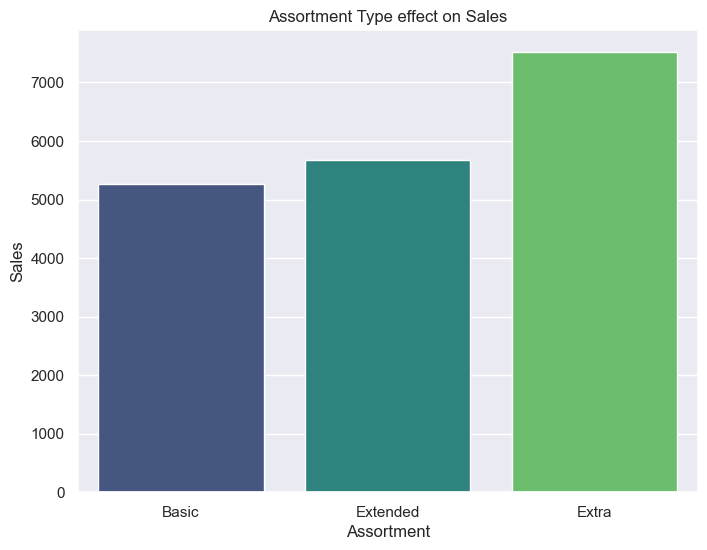

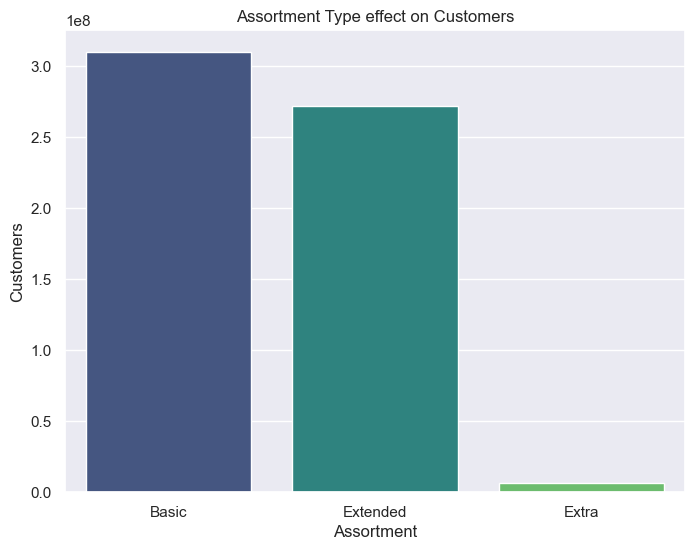

In [153]:
try:
    logger.info('Mapping Assortment types to specific names...')
    temp_df = clean_trainScore.copy()
    assortment_names = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}
    temp_df['Assortment'] = temp_df['Assortment'].map(assortment_names)
    logger.info('Mapping completed.')

    logger.info('Grouping and aggregating data for Sales and Customers by Assortment types...')
    assortment_agg = temp_df.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()
    logger.info('Grouping and aggregation completed.')

    logger.info('Plotting Assortment Type effect on Sales...')
    plt.figure(figsize=(8, 6))
    sns.barplot(data=assortment_agg, x='Assortment', y='Sales', palette='viridis')
    plt.title('Assortment Type effect on Sales')
    plt.xlabel('Assortment')
    plt.ylabel('Sales')
    plt.show()
    logger.info('Sales plot created.')

    logger.info('Plotting Assortment Type effect on Customers...')
    plt.figure(figsize=(8, 6))
    sns.barplot(data=assortment_agg, x='Assortment', y='Customers', palette='viridis')
    plt.title('Assortment Type effect on Customers')
    plt.xlabel('Assortment')
    plt.ylabel('Customers')
    plt.show()
    logger.info('Customers plot created.')

    logger.info('Displaying assortment_agg DataFrame:')
    logger.info(f'{assortment_agg}')
except Exception as e:
    logger.error(f'Error occurred: {e}')

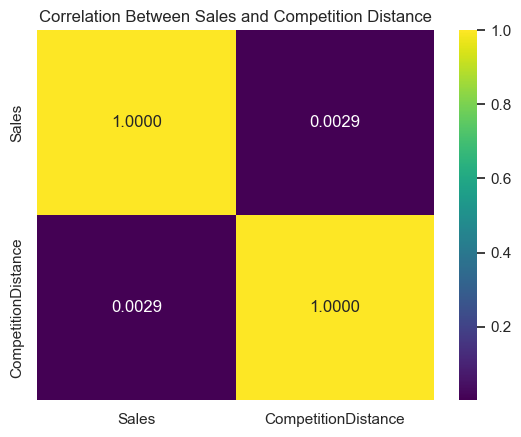

In [154]:
try:
    logger.info('Calculating correlation between Sales and CompetitionDistance...')
    columns = clean_trainScore[['Sales', 'CompetitionDistance']]
    correlation_matrix = columns.corr()

    logger.info('Plotting heatmap for correlation...')
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.4f')
    plt.title('Correlation Between Sales and Competition Distance')
    plt.show()
    logger.info('Heatmap for correlation created.')
except Exception as e:
    logger.error(f'Error occurred: {e}')

# Summary of the key insights from this data:

Sales Trends:

1. Steady monthly sales growth over the years, peaking in 2015.
2. Seasonal and weekly sales variations.
3. Promotions consistently boost sales.
4. Sunday & Monday has most sale comared to other days

Store Impact:

1. 'A' stores top total sales 'B' has most average sales.
2. 'C' and 'D' stores also perform well.
3. Sale for every store peaks during promotion period

Customer Behavior:

1. 'A' stores attract the most customers.
2. 'D' stores have higher customer spending.

Holiday Sales:

1. Public holidays lead to higher traffic.
2. Christmas lead to higher sales over stores
3. Promotions during holidays boost sales.

Store Groups:

1. Stores grouped by sales statistics.
2. Promotion Impact:
3. Promotions consistently increase sales,majorly peaks during holiday.
4. Promo2 impact varies yearly.

Assortment Levels:

1. Store types linked to specific assortment levels.

Competition Influence:

1. Competition distance impacts sales and customer counts.

PromoInterval Patterns:

1. "Jan,Apr,Jul,Oct" is the most common promo interval.
Correlation Insights:

* Strong correlations exist between sales, customers, and promos.
